In [976]:
import matplotlib.pyplot as plt # библиотека графиков 
import numpy as np #библиотека численных вычислений
from pint import UnitRegistry #библиотека единиц измерения
from itertools import cycle 
import matplotlib
matplotlib.rcParams['font.family'] = 'Times New Roman'  # Задайте нужный шрифт
matplotlib.rcParams['font.size'] = 12
u = UnitRegistry()
u.define("hAt = 50 * ampere") #определяем собственную единицу измерения
_color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [977]:
def prt(name, symbol, value):
    """
    Форматирует и выводит данные в табличном виде.

    :param name: Название параметра (например, "Диаметр").
    :param symbol: Обозначение параметра (например, "D_a").
    :param value: Значение параметра (например, "23mm").
    """
    # Устанавливаем ширину колонок
    col_widths = [40, 10, 10]  # Ширины колонок: Название, Обозначение, Значение

    # Формат строки
    row_format = f"{{:<{col_widths[0]}}} | {{:^{col_widths[1]}}} | {{:<{col_widths[2]}}}"

    
    # print("-" * (sum(col_widths) + 6))  # Разделитель (длина строк + разделители "|")

    # Печать значения
    print(row_format.format(name, symbol, str(value)))

In [978]:
S_n = 60000 * u.VA              #двигатель 
P_dv = 60000 * u.VA              #полная мощность
U_f = 120 * u.V                 # Напряжение фазы
m_f = 3                         #количество фаз
n_speed = 6000 / u.min          # частота вращения 
f = 400 * u.Hz                  # частота напряжения
eta = 0.8                       #КПД
cosfi = 0.99                    #коэффицент мощности (активной)
tetta = 20 * u.degree           #20 * u.degree # угол нагрузки
k_as = 0.2                      # коэффицент рассеяния
A_l = 33*10**3 * (u.A / (u.m))  #линейная токовая нагрузка
B_delta = 0.573 * u.T           #Магнитная индукция в зазоре
B_z = 1.8 * u.T                 #Магнитная индукция в зубце
k_f = np.pi / (2 * np.sqrt(2))  #коэффициент формы
k_a = np.sqrt(2)                # коэффициент амплитуды
k_o = 0.9                       #коэффиицент обмотки
lyambda = 0.4                   #отношение осевой длинны машины к диаметру якоря

k_yap = 1.5 #Коэффицент явнополюсности
k_LC =  1 # коэффициент типа нагрузки (индуктиынвая нагрузка)
k_DG = -1 # режим машины (двигательный)

In [979]:
tetta = k_DG * tetta
prt(r"Угол theta", "theta",tetta)
phi = np.arccos(cosfi) * k_LC *u.radian
prt(r"Угол phi", "phi",phi.to('degree'))
U_L = U_f * np.cos(phi)
prt(r"Активая составляющая напряжения", "U_L",U_L)
E_r = (U_L *(1-eta)/eta) * ((1+k_DG)/2) + U_L * (1 - eta) * k_DG * ((1-k_DG)/2)
prt(r"Падение напряжения", "E_r",E_r)
I_a = (S_n / (m_f * U_f)) * ( (1 + k_DG) / 2) + P_dv / (m_f * (U_f * np.cos(phi) + E_r)) * (1 - k_DG)/2
prt(r"Ток фазы", "I_a",I_a)

Угол theta                               |   theta    | -20 degree
Угол phi                                 |    phi     | 8.109614455994183 degree
Активая составляющая напряжения          |    U_L     | 118.8 volt
Падение напряжения                       |    E_r     | -23.759999999999994 volt
Ток фазы                                 |    I_a     | 210.43771043771042 volt_ampere / volt


In [980]:
P_pot = m_f * I_a *E_r * k_DG
prt(r"Потери", "P_pot",P_pot.to('W'))
psi = tetta + phi * k_LC
prt(r"Угол пси", "psi",psi.to('degree'))
E01 = (U_L + E_r) / np.cos(psi)
prt(r"ЭДС", "E01",E01)
P_el = m_f * I_a * (E01 * np.cos(psi) + E_r * k_DG)
prt(r"Электрическая мощность", "P_el",P_el)
P_meh = m_f * I_a * (E01 * np.cos(psi))
prt(r"Механическая мощность", "P_meh",P_meh)
P_1 = P_meh * ( (1 + k_DG) / 2) + P_el * ( (1 - k_DG) / 2)
P_2 = P_el * ( (1 + k_DG) / 2) + P_meh * ( (1 - k_DG) / 2)
prt(r"Мощность 1 = электрическая", "P_1",P_1)
prt(r"Мощность 2 = механическая", "P_2",P_2)


Потери                                   |   P_pot    | 14999.999999999996 watt
Угол пси                                 |    psi     | -11.890385544005817 degree
ЭДС                                      |    E01     | 97.1239325498397 volt
Электрическая мощность                   |    P_el    | 75000.0 volt_ampere
Механическая мощность                    |   P_meh    | 60000.0 volt_ampere
Мощность 1 = электрическая               |    P_1     | 75000.0 volt_ampere
Мощность 2 = механическая                |    P_2     | 60000.0 volt_ampere


In [981]:
S_n = S_n * ( (1 + k_DG) / 2) + m_f *  U_f * I_a * ( (1 - k_DG) / 2)
prt(r"Полная мощность", "S_n",S_n)
p = f.to('1/min') / n_speed # количество пар полюсов
p = p.to_base_units()
prt(r"Число пар полюсов", "p",p)

D_a = np.cbrt(((P_meh) / ((np.pi**2) * k_f * k_o * B_delta * A_l * \
                                lyambda * n_speed * np.cos(phi  + tetta))).to_base_units())
prt(r"Диаметр расточки якоря", "D_a",D_a)
tay = ((np.pi * D_a) / (2 * p)).to('mm') 
prt(r"Длинна полюсного деления", "tay",tay)
F_a = ((A_l * tay * k_o) / (2 * k_f)).to_base_units() * k_DG # МДС реакции якоря
F_a = F_a.to('hAt')
prt(r"МДС реакции якоря", "F_a",F_a)
E_L = U_f * np.sin(phi)
prt(r"Реактивная составляющая напряжения", "E_L",E_L)
E_c = E_L - (U_L + E_r) * np.tan(psi)
prt(r"Синхронная ЭДС", "E_c",E_c)

Полная мощность                          |    S_n     | 75757.57575757575 volt_ampere
Число пар полюсов                        |     p      | 4.0 dimensionless
Диаметр расточки якоря                   |    D_a     | 0.2017894537758523 meter
Длинна полюсного деления                 |    tay     | 79.24253319426434 millimeter
МДС реакции якоря                        |    F_a     | -21.188973633819934 hAt
Реактивная составляющая напряжения       |    E_L     | 16.92808317559907 volt
Синхронная ЭДС                           |    E_c     | 36.93949676749229 volt


In [982]:
E_s = E_c * k_as
prt("ЭДС рассеяния", "E_s", E_s)
E_a = E_c - E_s
prt("ЭДС реакции", "E_a", E_a)
I_d = I_a * np.sin(psi)             # Проекция тока фазы на ось d
prt("Ток d-оси", "I_d", I_d)
I_q = I_a * np.cos(psi)
prt("Ток q-оси", "I_q", I_q)
I_aktiv = I_a * np.cos(phi)
prt("Активный ток", "I_aktiv", I_aktiv)
I_re = I_a * np.sin(phi)
prt("Реактивный ток", "I_re", I_re)
L_s = lyambda * D_a    # Осевая длина машины
prt("Осевая длина машины", "L_s", L_s)
w_a = ((A_l * np.pi * D_a) / (m_f * I_a * 2)).to_base_units()
prt("Число обмоток статора", "w_a", w_a)
E_0 = 4 * k_f * B_delta * L_s * w_a * f * k_o * tay
prt("ЭДС", "E_0", E_0.to('V'))
gamma = -90 * u.deg - psi
prt("Угол γ", "gamma", gamma)
E_i = np.sqrt((E_L - E_s)**2 + (U_L + E_r)**2)
prt("ЭДС от результирующего поля", "E_i", E_i)
F_ad = F_a * np.sin(psi)  # МДС реакции якоря продольной оси
F_ad = F_ad.to('hAt')
prt("МДС реакции якоря d-оси", "F_ad", F_ad)
F_aq = F_a * np.cos(psi)  # МДС реакции якоря поперечной оси
F_aq = F_aq.to('hAt')
prt("МДС реакции якоря q-оси", "F_aq", F_aq)
E_ad = E_a * np.cos(gamma)
E_aq = E_a * np.sin(gamma)
prt("ЭДС реакции якоря d-оси", "E_ad", E_ad)
prt("ЭДС реакции якоря q-оси", "E_aq", E_aq)
E_q = E_c * np.sin(gamma)
E_d = E_c * np.cos(gamma)
prt("Составляющая ЭДС q-оси", "E_q", E_q)
prt("Составляющая ЭДС d-оси", "E_d", E_d)
# Расчёт углов и полюсов
fi_betta = np.arccos((U_L + E_r) / E_i)
prt("Угол fi_betta", "fi_betta", fi_betta.to('deg'))
betta = fi_betta - phi
prt("Угол betta ", "betta", betta.to('deg'))
F_i = F_aq / np.sin(tetta + (phi - fi_betta))
F_i = F_i.to('hAt')
prt("Результирущая МДС", "F_i", F_i)
F_xx = np.sqrt(F_i**2 - F_aq**2)
prt("МДС ХХ", "F_xx", F_xx)
F_0 = F_xx + F_ad
prt("МДС намагнчивания", "F_0", F_0)

ЭДС рассеяния                            |    E_s     | 7.387899353498458 volt
ЭДС реакции                              |    E_a     | 29.55159741399383 volt
Ток d-оси                                |    I_d     | -43.35858267208352 volt_ampere / volt
Ток q-оси                                |    I_q     | 205.92246910653958 volt_ampere / volt
Активный ток                             |  I_aktiv   | 208.33333333333331 volt_ampere / volt
Реактивный ток                           |    I_re    | 29.68589221310162 volt_ampere / volt
Осевая длина машины                      |    L_s     | 0.08071578151034092 meter
Число обмоток статора                    |    w_a     | 16.568662780522345 dimensionless
ЭДС                                      |    E_0     | 97.12393254983971 volt
Угол γ                                   |   gamma    | -78.10961445599418 degree
ЭДС от результирующего поля              |    E_i     | 95.51762511369026 volt
МДС реакции якоря d-оси                  |    F_ad    | 

In [983]:
# Расчёт индуктивных сопротивлений
X_L =  E_L / I_a
X_s = E_s / I_a
X_c = (E_c / I_a)
X_ad = -E_ad / I_d
X_aq = -E_aq / I_q
X_d = X_ad + X_s
X_q = X_aq + X_s
X_dyap = X_d * k_yap
X_adyap = X_ad * k_yap
prt("Реактивное сопротивление фазы",       "X_L",    X_L.to('ohm'))
prt("Синхронное реактивное сопротивление",  "X_s",    X_s.to('ohm'))
prt("Соответствующее сопротивление обмотки","X_c",    X_c.to('ohm'))
prt("Реактивное сопротивление d-оси",      "X_ad",   X_ad.to('ohm'))
prt("Реактивное сопротивление q-оси",      "X_aq",   X_aq.to('ohm'))
prt("Полное сопротивление d-оси",          "X_d",    X_d.to('ohm'))
prt("Полное сопротивление q-оси",          "X_q",    X_q.to('ohm'))
prt("Явнополюсное X_d",                     "X_dyap", X_dyap.to('ohm'))
prt("Явнополюсное X_ad",                    "X_adyap",X_adyap.to('ohm'))

Реактивное сопротивление фазы            |    X_L     | 0.0804422512504468 ohm
Синхронное реактивное сопротивление      |    X_s     | 0.03510729772782468 ohm
Соответствующее сопротивление обмотки    |    X_c     | 0.17553648863912336 ohm
Реактивное сопротивление d-оси           |    X_ad    | 0.14042919091129877 ohm
Реактивное сопротивление q-оси           |    X_aq    | 0.14042919091129868 ohm
Полное сопротивление d-оси               |    X_d     | 0.17553648863912344 ohm
Полное сопротивление q-оси               |    X_q     | 0.17553648863912336 ohm
Явнополюсное X_d                         |   X_dyap   | 0.2633047329586852 ohm
Явнополюсное X_ad                        |  X_adyap   | 0.21064378636694814 ohm


In [984]:
E_dyap = X_dyap * I_d 
prt("ЭДС явнополюсного генератора",         "E_dyap", E_dyap.to('V'))
E_yap = E_dyap - E_d
prt("ЭДС явнополюсности",         "E_yap",  E_yap.to('V'))
E_0yap = E_0 - E_yap
prt("Суммарная ЭДС c явнополюсностью",         "E_0yap",  E_0yap.to('V'))
E_dyap = (E_0yap - E_0) + E_d # пересчитваем E_dyap ибо оно должно быть больше E_yap
E_dyap = E_dyap.to('V')
prt("ЭДС явнополсюности по оси d",         "E_dyap",  E_dyap.to('V'))
fi_R = np.arctan(E_L / (U_L - E_r))
prt("Угол fi_R", "fi_R", fi_R.to('deg'))
delta_fi_R = phi - fi_R
prt("Угол delta_fi_R", "delta_fi_R", delta_fi_R.to('deg'))

ЭДС явнополюсного генератора             |   E_dyap   | -11.416520031940026 volt
ЭДС явнополюсности                       |   E_yap    | -19.02753338656671 volt
Суммарная ЭДС c явнополюсностью          |   E_0yap   | 116.15146593640641 volt
ЭДС явнополсюности по оси d              |   E_dyap   | 26.63854674119339 volt
Угол fi_R                                |    fi_R    | 6.771796612081138 degree
Угол delta_fi_R                          | delta_fi_R | 1.3378178439130448 degree


In [985]:
#продолжение расчётов
#Найдём ток возбуждения
I_d25 = 25 * u.A
k_ampl = np.sqrt(2)
k_t = np.sqrt(3/2)
I_v = I_d25 * k_ampl * k_t #ток возбуждения
w_ov = F_0 / I_v #число витков для обмотки возбуждения
print(f"ток возбуждения I_v = {I_v}")
print(f"число витков ОВ w_ov = {w_ov.to_base_units()}")

#если используем постоянные магниты то
mu = 1.07
mu_0 = 4 * np.pi * 10**-7 * u.henry / u.meter
H_c = 834000 * u.A/u.m
h_m = (F_0 * mu * mu_0) / (mu * mu_0 * H_c - B_delta)
print(f"Необхoдимая толщина постоянного магнита h_m = {h_m.to('mm')}")
print(F_0)

ток возбуждения I_v = 43.30127018922193 ampere
число витков ОВ w_ov = 80.41268913081487 dimensionless
Необхoдимая толщина постоянного магнита h_m = 8.537351742000741 millimeter
69.63943157390648 hAt


In [986]:
gatito_width = 0.0025
# функции для векторных диаграмм
def component(value, angle):
    ValueX = value * np.cos(angle)
    ValueY = value * np.sin(angle)
    return ValueX, ValueY

def vector(*args, x0 = 0, y0 = 0, color = None, width = gatito_width, \
             headlength = 5, headaxislength = 4.5, headwidth = 3):

    if len(args) == 1 and isinstance(args[0], (tuple, list)):
        x, y = args[0]
    elif len(args) == 2:
        # Если переданы x и y отдельно
        x, y = args
    else:
        raise ValueError("Передайте либо кортеж/список (x, y), либо два значения x и y.")
    
    if color is None:
        color = next(_color_cycle)
    
    plt.quiver(x0, y0, x, y, color = color,  width=width,\
               angles='xy' ,scale_units='xy', scale=1, \
                headlength = headlength, headaxislength = headaxislength, headwidth = headwidth)

def _strip_units(val):
    try:
        return val.magnitude  # если это объект pint.Quantity
    except AttributeError:
        return val  # если обычное число
    
def vector_from_vector(vec_to_draw, vec_base=(0, 0), color=None, width=gatito_width,
                       headlength=5, headaxislength=4.5, headwidth=3):
    """
    Рисует вектор vec_to_draw, начиная с конца вектора vec_base.
    Если цвет не задан, он выбирается автоматически (разный от предыдущих).
    """
    vx, vy = (_strip_units(c) for c in vec_to_draw)
    bx, by = (_strip_units(c) for c in vec_base)

    if color is None:
        color = next(_color_cycle)

    plt.quiver(bx, by, vx, vy,
               color=color, width=width,
               angles='xy', scale_units='xy', scale=1,
               headlength=headlength, headaxislength=headaxislength, headwidth=headwidth)

In [987]:
class Vector(tuple):
    def __new__(cls, x, y=None):
        if y is None and isinstance(x, (tuple, list, Vector)):
            return super(Vector, cls).__new__(cls, (x[0], x[1]))
        elif y is not None:
            return super(Vector, cls).__new__(cls, (x, y))
        else:
            raise ValueError("Vector requires (x, y) or ((x, y))")

    @property
    def x(self):
        return self[0]

    @property
    def y(self):
        return self[1]

    def shift(self, dx=0, dy=0):
        dx = self._fix_unit(self.x, dx)
        dy = self._fix_unit(self.y, dy)
        return Vector(self.x + dx, self.y + dy)

    @staticmethod
    def _fix_unit(ref, delta):
        try:
            return delta * ref.units
        except AttributeError:
            return delta
    
    def __add__(self, other):
        if isinstance(other, (tuple, Vector)):
            return Vector(self.x + other[0], self.y + other[1])
        return NotImplemented

    def __sub__(self, other):
        if isinstance(other, (tuple, Vector)):
            return Vector(self.x - other[0], self.y - other[1])
        return NotImplemented

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

    def __truediv__(self, scalar):
        return Vector(self.x / scalar, self.y / scalar)
    
def _unwrap(val):
    """
    Если _val_ — объект pint.Quantity, вернуть его .magnitude,
    иначе вернуть сам val.
    """
    try:
        return val.magnitude
    except AttributeError:
        return val

def draw_label(position, text, color="black", dx=0, dy=0, fontsize=7.5):
    """
    Ручная подпись: ставим текст в точке + смещение.
    position: Vector или кортеж (x, y) с pint.Quantity или простыми числами.
    dx, dy: смещение в тех же единицах, что и позиция (float).
    """
    # достаём координаты
    if hasattr(position, 'x') and hasattr(position, 'y'):
        x_raw, y_raw = position.x, position.y
    else:
        x_raw, y_raw = position[0], position[1]
    # извлекаем значение без единиц
    x, y = _unwrap(x_raw), _unwrap(y_raw)
    
    plt.text(x + dx, y + dy, text,
             color=color, ha='center', va='center', fontsize=fontsize)

In [988]:
I_axy = I_ax, I_ay = component(I_a, 0)
U_fxy = U_fx, U_fy = component(U_f, phi)
E_0xy = E_0x, E_0y = component(E01, psi)
E_rxy = E_rx, E_ry = component(E_r, 0)
E_cxy = E_cx, E_cy = component(E_c, 90 * u.deg)
I_dxy = I_dx,I_dy = component(-I_d, -gamma) 
I_qxy = I_qx, I_qy = component(I_q, psi)
E_ixy = E_ix, E_iy = component(E_i, fi_betta)

E_sxy = E_sx, E_sy = component(E_s, (np.pi/2))

F_axy = F_ax,F_ay = component(F_a, 0)
F_aqxy = F_aqx, F_aqy = component(-F_aq, np.pi + psi)
F_adxy = F_adx,F_ady = component(F_ad, -gamma)

F_ixy = F_ix, F_iy = component(F_i, fi_betta.to('radian') + (np.pi / 2))
F_xxxy = F_xxx, F_xxy = component(F_xx, psi.to('radian') + (np.pi/2) )
F_0xy = F_0x, F_0y = component(F_0, psi.to('radian') + (np.pi/2) )
E_yapxy = E_yapx, E_yapy = component(-E_yap, psi)
E_yapxy = Vector(E_yapxy)
E_0yapxy = E_0yapx, E_0yapy = component(E_0yap.to('V'), psi)

# notnot
E_adxy = E_adx, E_ady = component(-E_ad, (-np.pi/2)-gamma)
E_aqxy = E_aqx, E_aqy = component(-E_aq, -gamma)
E_dxy = E_dx, E_dy = component(-E_d, (-np.pi/2)-gamma)
E_qxy = E_qx,E_qy = component(-E_q, -gamma)

E_dyapxy = E_dyapx, E_dyapy = component(-E_dyap, (-np.pi/2)-gamma)


E_axy = E_ax, E_ay = component(E_a, np.pi/2)


E_aqxy = Vector(E_aqxy)
E_adxy = Vector(E_adxy)

E_dxy = Vector(E_dxy)
E_qxy = Vector(E_qxy)

E_0xy = Vector(E_0xy)
F_adxy = Vector(F_adxy)
F_xxxy = Vector(F_xxxy)
E_ixy = Vector(E_ixy)
E_0yapxy = Vector(E_0yapxy)






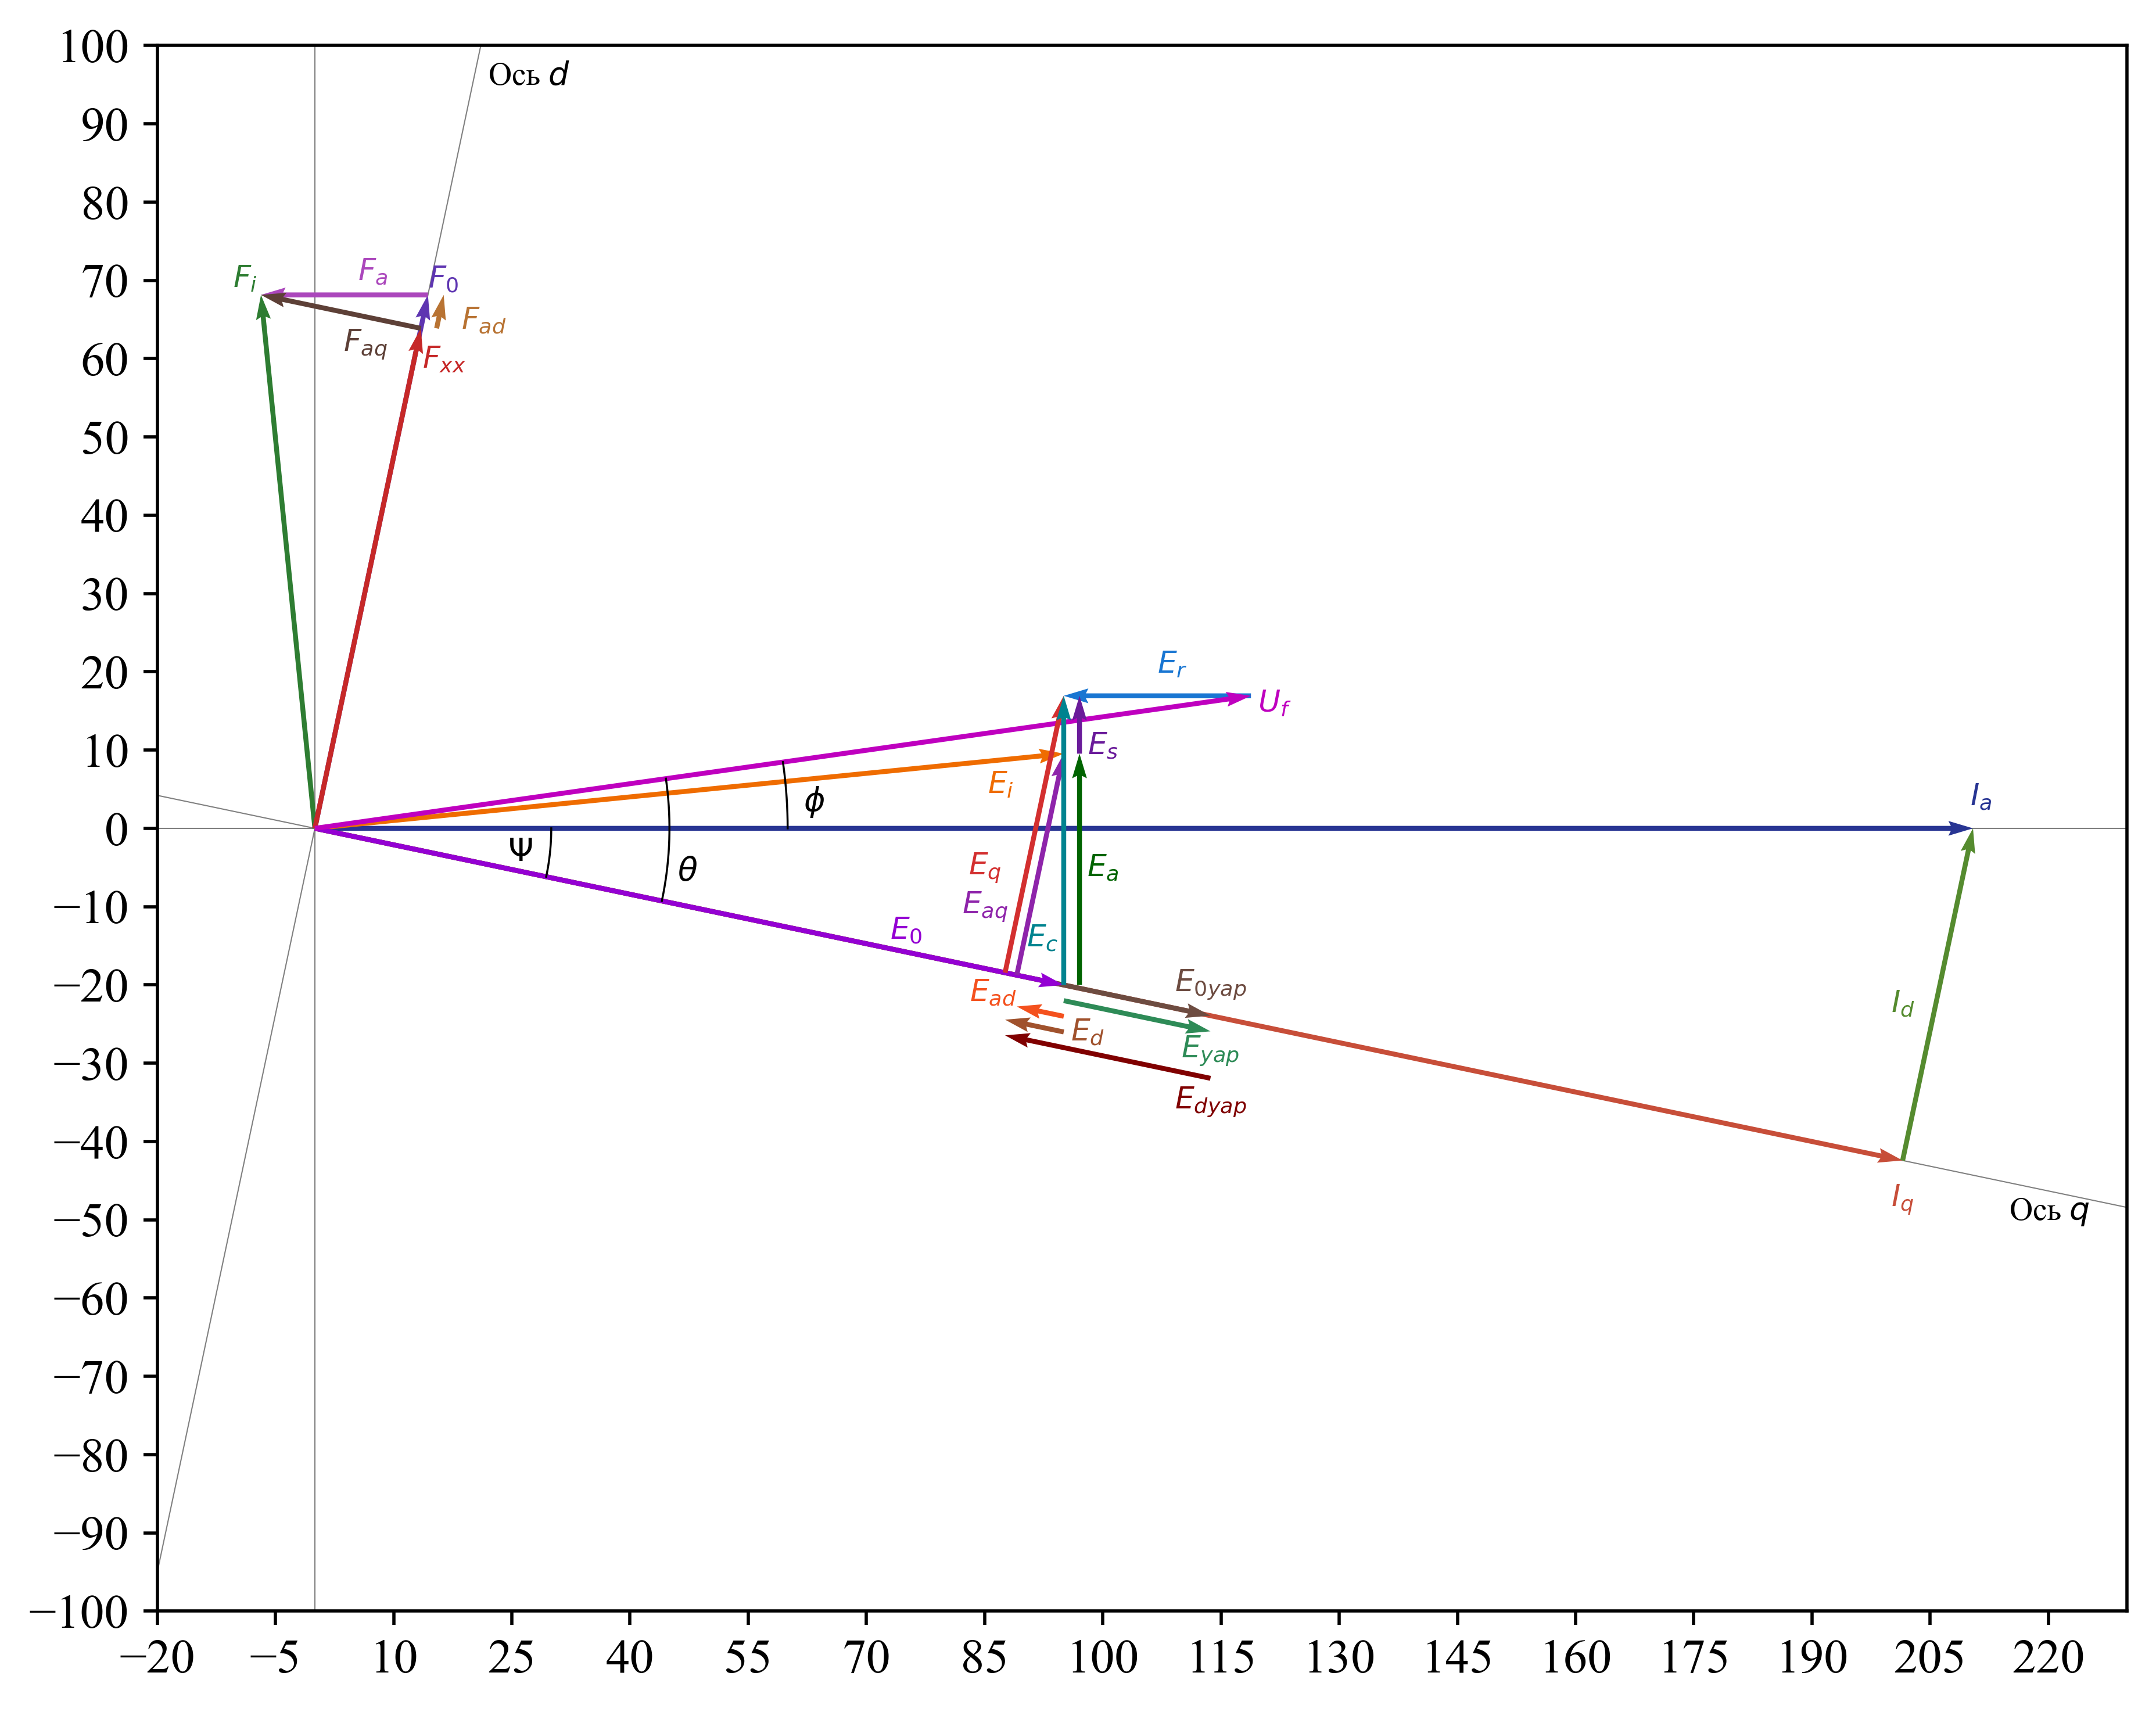

In [989]:
fig, ax = plt.subplots(figsize=(7*1.25, 7), dpi = 500)
ax.axhline(0, color='grey', linewidth=0.3, linestyle='-', zorder=1)
ax.axvline(0, color='grey', linewidth=0.3, linestyle='-', zorder=1)

# Рисуем оси под углом
angle = psi  # Угол в градусах

# Координаты для осей под углом
length = 500  # Длина осей
x1, y1 = length * np.cos(angle), length * np.sin(angle)
x2, y2 = -x1, -y1
ax.plot([0, x1], [0, y1], color='grey', linestyle='-', linewidth=0.3, zorder=1)
ax.plot([0, x2], [0, y2], color='grey', linestyle='-', linewidth=0.3, zorder=1)

angle = psi - (np.pi/2)  # Угол в градусах
x1, y1 = length * np.cos(angle), length * np.sin(angle)
x2, y2 = -x1, -y1
ax.plot([0, x1], [0, y1], color='grey', linestyle='-', linewidth=0.3, zorder=1)
ax.plot([0, x2], [0, y2], color='grey', linestyle='-', linewidth=0.3, zorder=1)
# =================== Векторы ===================

# vector(F_ixy)
# vector(I_qxy)
# vector(I_axy)
# vector(U_fxy)
# vector(F_0xy)
# vector(E_ixy)
# vector(F_xxxy)
# vector(E_0yapxy)
# vector(E_0xy)


# vector_from_vector(I_dxy, I_qxy)
# vector_from_vector(E_cxy, E_0xy)
# vector_from_vector(E_rxy, U_fxy)
# vector_from_vector(E_dxy, E_0xy.shift(0,-6))
# vector_from_vector(F_axy, F_0xy)
# vector_from_vector(E_yapxy.shift(0,0), E_0xy.shift(-0,-2))
# vector_from_vector(F_adxy, F_xxxy.shift(2,0))
# vector_from_vector(F_aqxy, F_xxxy.shift(0,0))
# vector_from_vector(E_adxy, E_0xy.shift(0,-4))
# vector_from_vector(E_aqxy, E_0xy.__add__(E_adxy))
# vector_from_vector(E_axy, E_0xy.shift(2,0))
# vector_from_vector(E_qxy, E_0xy.__add__(E_dxy))
# vector_from_vector(E_dyapxy, E_0yapxy.shift(0, -8))
# vector_from_vector(E_sxy, E_ixy.shift(2,0))

# Пастельная палитра
colors =    {
    'F_ixy':     '#2E7D32',  # лесной зелёный
    'I_qxy':     '#C74E39',  # терракотовый
    'I_axy':     '#283593',  # глубокий индиго
    'U_fxy':     'm',#F9A825',  # янтарный жёлтый
    'F_0xy':     '#5E35B1',  # индиго-фиолетовый
    'E_ixy':     '#EF6C00',  # яркий оранжевый
    'F_xxxy':    '#C62828',  # --насыщенная бирюза
    'E_0yapxy':  '#6D4C41',  # кофейный коричневый
    'E_0xy':     '#9400D3',  # darkviolet
    'I_dxy':     '#558B2F',  # глубокий зелёный
    'E_cxy':     '#00838F',  # -кирпичный красный
    'E_rxy':     '#1976D2',  # чистый синий
    'E_dxy':     '#A0522D',  # тёмная сиенна
    'F_axy':     '#AB47BC',  # яркая сирень
    'E_yapxy':   '#2E8B57',  # изумрудный зелёный
    'F_adxy':    '#B87333',  # медный
    'F_aqxy':    '#5D4037',  # тёмно-шоколадный
    'E_adxy':    '#F4511E',  # кирпично-оранжевый
    'E_aqxy':    '#8E24AA',  # тёмная сирень
    'E_axy':     '#006400',  # тёмный зелёный
    'E_qxy':     '#D32F2F',  # насыщенный алый
    'E_dyapxy':  '#800000',  # глубокий бордовый
    'E_sxy':     '#6A1B9A',  # глубокий пурпурный 
}

# Создание векторов
vector(F_ixy,    color=colors['F_ixy'])
vector(I_qxy,    color=colors['I_qxy'])
vector(I_axy,    color=colors['I_axy'])
vector(F_0xy,    color=colors['F_0xy'])
vector(E_ixy,    color=colors['E_ixy'])
vector(F_xxxy,   color=colors['F_xxxy'])
vector(E_0yapxy, color=colors['E_0yapxy'])
vector(E_0xy,    color=colors['E_0xy'])

# Построение стрелок
vector_from_vector(I_dxy,    I_qxy,           color=colors['I_dxy'])
vector_from_vector(E_rxy,    U_fxy,           color=colors['E_rxy'])

vector(U_fxy,    color=colors['U_fxy'])

vector_from_vector(E_dxy,    E_0xy.shift(0,-6), color=colors['E_dxy'])
vector_from_vector(F_axy,    F_0xy,           color=colors['F_axy'])
vector_from_vector(E_yapxy.shift(0,0), E_0xy.shift(0,-2), color=colors['E_yapxy'])
vector_from_vector(F_adxy,   F_xxxy.shift(2,0), color=colors['F_adxy'])
vector_from_vector(F_aqxy,   F_xxxy.shift(0,0), color=colors['F_aqxy'])
vector_from_vector(E_adxy,   E_0xy.shift(0,-4), color=colors['E_adxy'])
vector_from_vector(E_aqxy,   E_0xy.__add__(E_adxy), color=colors['E_aqxy'])
vector_from_vector(E_axy,    E_0xy.shift(2,0),  color=colors['E_axy'])
vector_from_vector(E_qxy,    E_0xy.__add__(E_dxy), color=colors['E_qxy'])
vector_from_vector(E_dyapxy, E_0yapxy.shift(0,-8), color=colors['E_dyapxy'])
vector_from_vector(E_sxy,    E_ixy.shift(2,0),  color=colors['E_sxy'])
vector_from_vector(E_cxy,    E_0xy,           color=colors['E_cxy'])

# draw_label(I_qxy, r"$I_{d}$", color=colors['I_dxy'], dx=10, dy=20)

draw_label(F_ixy,    r"$F_{i}$",    color=colors['F_ixy'],      dx=-2, dy=2)
draw_label(I_qxy,    r"$I_{q}$",    color=colors['I_qxy'],      dx=0, dy=-5)
draw_label(I_axy,    r"$I_{a}$",    color=colors['I_axy'],      dx=1, dy=4)
draw_label(F_0xy,    r"$F_{0}$",    color=colors['F_0xy'],      dx=2, dy=2)
draw_label(E_ixy,    r"$E_{i}$",    color=colors['E_ixy'],      dx=-8, dy=-4)
draw_label(F_xxxy,   r"$F_{xx}$",   color=colors['F_xxxy'],     dx=3, dy=-4)
draw_label(E_0yapxy, r"$E_{0yap}$", color=colors['E_0yapxy'],   dx=0, dy=4)
draw_label(E_0xy,    r"$E_{0}$",    color=colors['E_0xy'],      dx=-20, dy=7)

draw_label(I_qxy,    r"$I_{d}$",    color=colors['I_dxy'],      dx=0, dy=20)
draw_label(U_fxy,    r"$E_{r}$",    color=colors['E_rxy'],      dx=-10, dy=4)

draw_label(U_fxy,    r"$U_{f}$",    color=colors['U_fxy'],      dx=3, dy=-1)

draw_label(E_0xy,    r"$E_{d}$",    color=colors['E_dxy'],      dx=3, dy=-6)
draw_label(F_0xy,    r"$F_{a}$",    color=colors['F_axy'],      dx=-7, dy=3)
draw_label(E_0yapxy,  r"$E_{yap}$",  color=colors['E_yapxy'],   dx=0, dy=-4.5)
draw_label(F_xxxy,   r"$F_{ad}$",   color=colors['F_adxy'],     dx=8, dy=1)
draw_label(F_xxxy,   r"$F_{aq}$",   color=colors['F_aqxy'],     dx=-7, dy=-2)
draw_label(E_0xy,   r"$E_{ad}$",   color=colors['E_adxy'],      dx=-9, dy=-1)
draw_label(E_0xy,   r"$E_{aq}$",   color=colors['E_aqxy'],      dx=-10, dy=10)
draw_label(E_0xy,    r"$E_{a}$",    color=colors['E_axy'],      dx=5, dy=15)
draw_label(E_0xy,    r"$E_{q}$",    color=colors['E_qxy'],      dx=-10, dy=15)
draw_label(E_0yapxy, r"$E_{dyap}$", color=colors['E_dyapxy'],   dx=0, dy=-11)
draw_label(E_ixy,    r"$E_{s}$",    color=colors['E_sxy'],      dx=5, dy=1)
draw_label(E_0xy,    r"$E_{c}$",    color=colors['E_cxy'],      dx=-2.7, dy=6)




# =============================================

angle_ksi = np.linspace(0, psi.to('rad').magnitude, 200)  # Угол 45 градусов
arc_x = 30 * np.cos(angle_ksi)  # Радиус дуги 0.2
arc_y = 30 * np.sin(angle_ksi)
plt.plot(arc_x, arc_y, color='black', lw = 0.5)
plt.text(25 * np.cos(psi.to('rad').magnitude) + 0, 25 * np.sin(psi.to('rad').magnitude) + 1, r'$\Psi$', fontsize = 8)

angle_fi = np.linspace(0, phi.magnitude, 200)  # Угол 45 градусов
arc_x = 60 * np.cos(angle_fi)  # Радиус дуги 0.2
arc_y = 60 * np.sin(angle_fi)
plt.plot(arc_x, arc_y, color='black', lw = 0.5)
plt.text( 62, 2.2, r'$\phi$', fontsize = 8)

angle_tetta =  np.linspace( phi.magnitude, psi.to('rad').magnitude, 200)  # Угол 45 градусов
arc_x_tetta = 45 * np.cos(angle_tetta)  # Радиус дуги 0.2
arc_y_tetta = 45 * np.sin(angle_tetta)
plt.plot(arc_x_tetta, arc_y_tetta, color='black', lw = 0.5)
plt.text(47 * np.cos(psi.to('rad').magnitude) + 0, 47 * np.sin(psi.to('rad').magnitude) + 3, r'$\theta$', fontsize = 8)

plt.text( 22, 95 , r'Ось $d$', fontsize = 8)
plt.text( 215, -50 , r'Ось $q$', fontsize = 8)

x_major_ticks = np.arange(-20, 230, 15)  # Основные деления по X (шаг 1)
y_major_ticks = np.arange(-100, 101, 10)  # Основные деления по Y (шаг 0.5)
plt.xticks(x_major_ticks)
plt.yticks(y_major_ticks)

plt.xlim(-20, 230)
plt.ylim(-100, 100)

plt.xlabel("")  # Ос подпишется с учетом единиц
plt.ylabel("")

plt.show()

In [990]:
I_f = I_a.to('A')
X_q = X_q.to("ohm")
X_dyap = X_dyap.to("ohm")
U_etta = U_f

In [991]:
plt.figure(figsize=(10, 6), dpi = 100)


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [992]:
# GRAFICI

In [993]:
print(E_0yap.to('V'))
E_0yap = E_0yap.to('V')
print(delta_fi_R.to('deg'))

116.15146593640641 volt
1.3378178439130448 degree


C:\Users\Bolyt\AppData\Local\Temp\ipykernel_9416\4147573554.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-." (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.degrees(theta), P_2_around_Ueta, "r-.", linewidth = 2, c ="r")


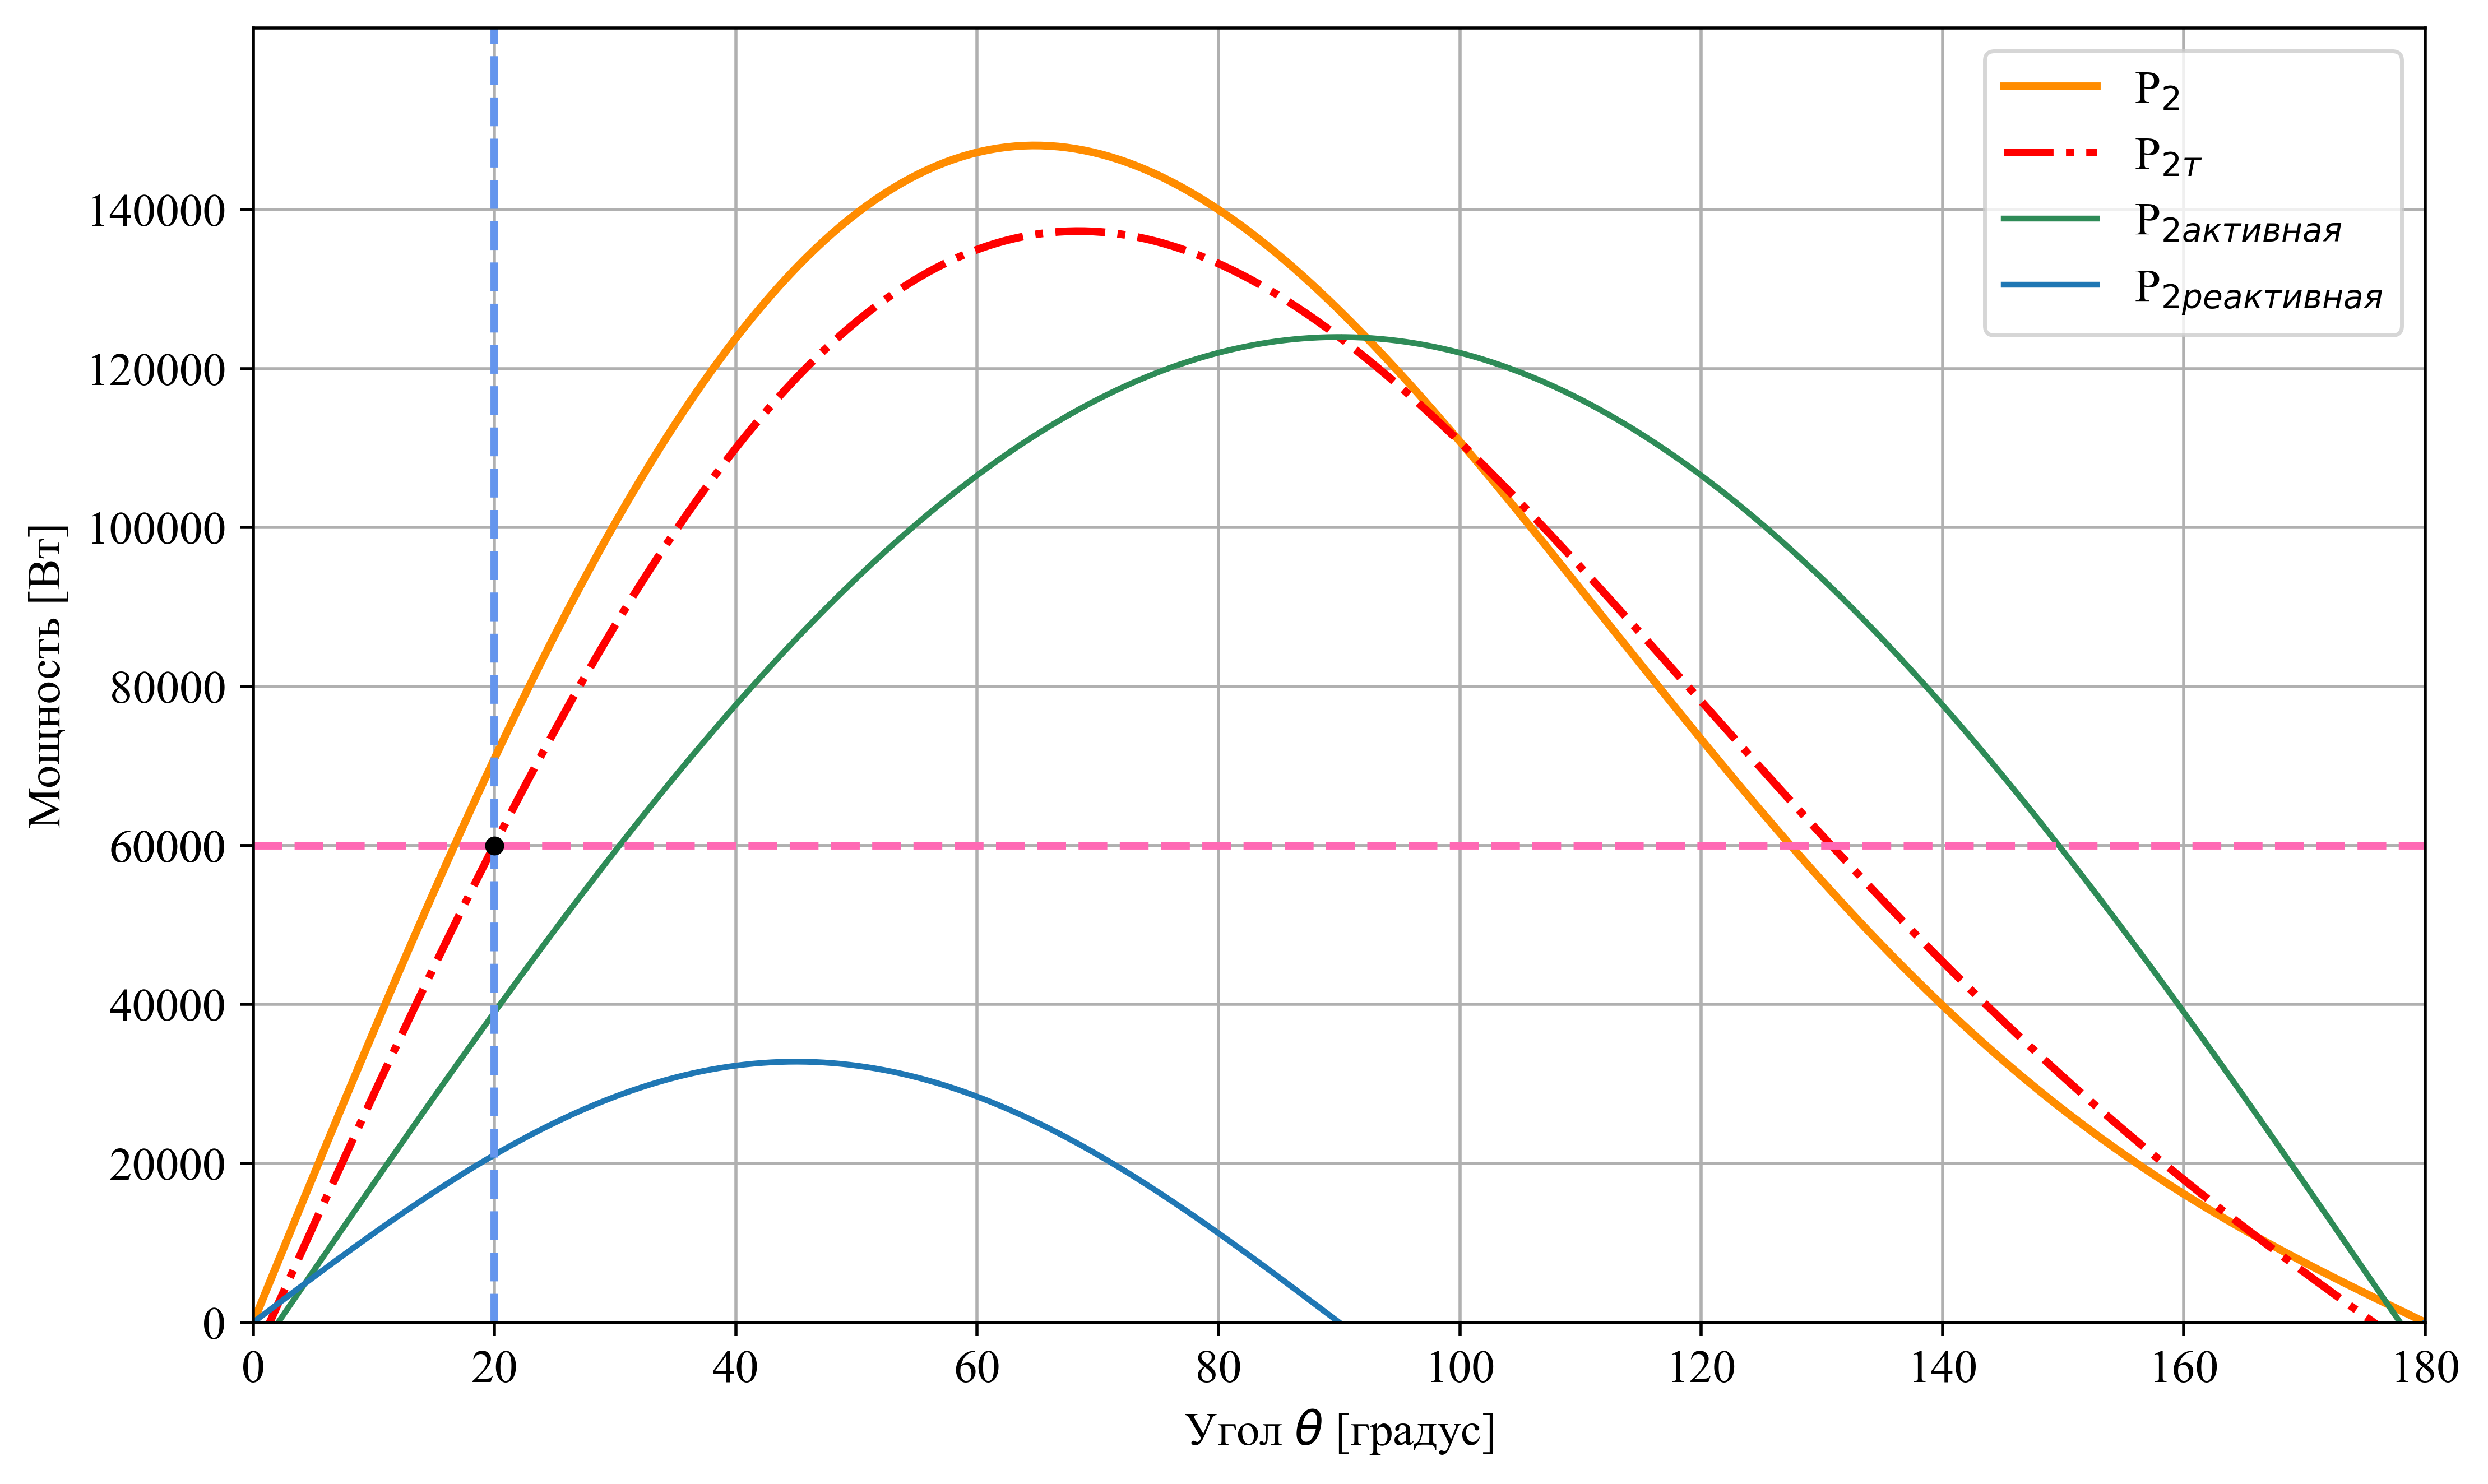

In [994]:
plt.figure(figsize=(10, 6), dpi = 500)
delta_fi_R = - delta_fi_R
theta = np.linspace( - np.pi, np.pi, 500)
#формулы для графика
P_2_around_Ueta = m_f * U_f * eta *((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta)+ \
        ((E_0yap / X_dyap) + U_etta * np.sin(theta)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2_val =((m_f * E_0yap * (U_f + E_r)) * np.sin(theta)/ X_dyap)\
       + ((m_f * (U_f**2 + E_r**2)/2) * ((1/X_q)-(1/X_dyap))*np.sin(2 * theta))

P_2ak = m_f * U_f * eta * (((E_0yap / X_dyap) + U_etta * np.sin(theta)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2reak = m_f * U_f * eta * ((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta))

#для номинальных значений
theta1 = 20 * u.deg
P_2_around_Ueta1 = m_f * U_f * eta *((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta1)+ \
        ((E_0yap / X_dyap) + U_etta * np.sin(theta1)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta1)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2_val1 =((m_f * E_0yap * (U_f - E_r)) * np.sin(theta1)/ X_dyap)\
       + ((m_f * (U_f**2 - E_r**2)/2) * ((1/X_q)-(1/X_dyap))*np.sin(2 * theta1))

P_2ak1 = m_f * U_f * eta * (((E_0yap / X_dyap) + U_etta * np.sin(theta1)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta1)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2reak1 = m_f * U_f * eta * ((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta1))


# psi = np.linspace(+np.pi, -np.pi, 1000)
# P2_psi = m_f * (E_0 * np.sin(psi)/ (X_L + -X_c)) * (E_0 * np.cos(psi) - U_r) * etta
# plt.plot(np.degrees(psi), P2_psi)

plt.plot(np.degrees(theta), P_2_val, linewidth = 2, c = "darkorange")
plt.plot(np.degrees(theta), P_2_around_Ueta, "r-.", linewidth = 2, c ="r")
plt.plot(np.degrees(theta), P_2ak, c = "seagreen")
plt.plot(np.degrees(theta), P_2reak)
plt.xlim(-np.degrees(np.pi), np.degrees(np.pi))
theta = 20 *u.deg
plt.legend ((f"P$_2$",\
              r"P$_{2т}$",\
                       r"P$_{2 активная}$", r"P$_{2 реактивная}$"))
# r"P$_{\psi}$ (Вт)"
plt.grid()
# plt.tick_params(axis='both', labelsize=10)
x_major_ticks1 = np.arange(-180, 181, 20)  # Основные деления по X (шаг 1)
plt.xticks(x_major_ticks1)
y_major_ticks1 = np.arange(0, 160000, 160000/8)  # Основные деления по X (шаг 1)
plt.yticks(y_major_ticks1)

current_ticks = plt.gca().get_yticks()
new_ticks = np.append(current_ticks, P_2.magnitude)
plt.gca().set_yticks(new_ticks)
plt.xlim(0, 180)
plt.ylim(0)

plt.ylabel(r"Мощность [Вт]")
plt.xlabel(r"Угол ${\theta}$ [градус]")
# plt.axhline(P_2,color = "hotpink", linestyle = "--", linewidth = 1)
plt.axvline(tetta, color = "cornflowerblue", linestyle = "--", linewidth = 1)
# plt.axvline(I_f, color="red", linestyle="--", label="Ток фазы")
# plt.axhline(U_f, color="blue", linestyle="--", label="Напряжение фазы")

plt.axhline(round(P_2.to('W').m),color = "hotpink", linestyle = "--", linewidth = 2)
plt.axvline(theta.to('deg').m, color = "cornflowerblue", linestyle = "--", linewidth = 2)


plt.scatter(theta.to('deg').m, round(P_2.to('W').m), color="black",  s=15, zorder=10)
plt.show()
 

Внешняя характеристика

In [995]:
R_a = E_r / I_a
E_0 = E_0.to('V')
print(X_c.to('ohm'))
I_a = I_a.to('A')
X_c = X_c.to('ohm')

phiC = - 10 * u.deg
phiL = 45 * u.deg
phiN = 0 * u.deg

0.17553648863912336 ohm


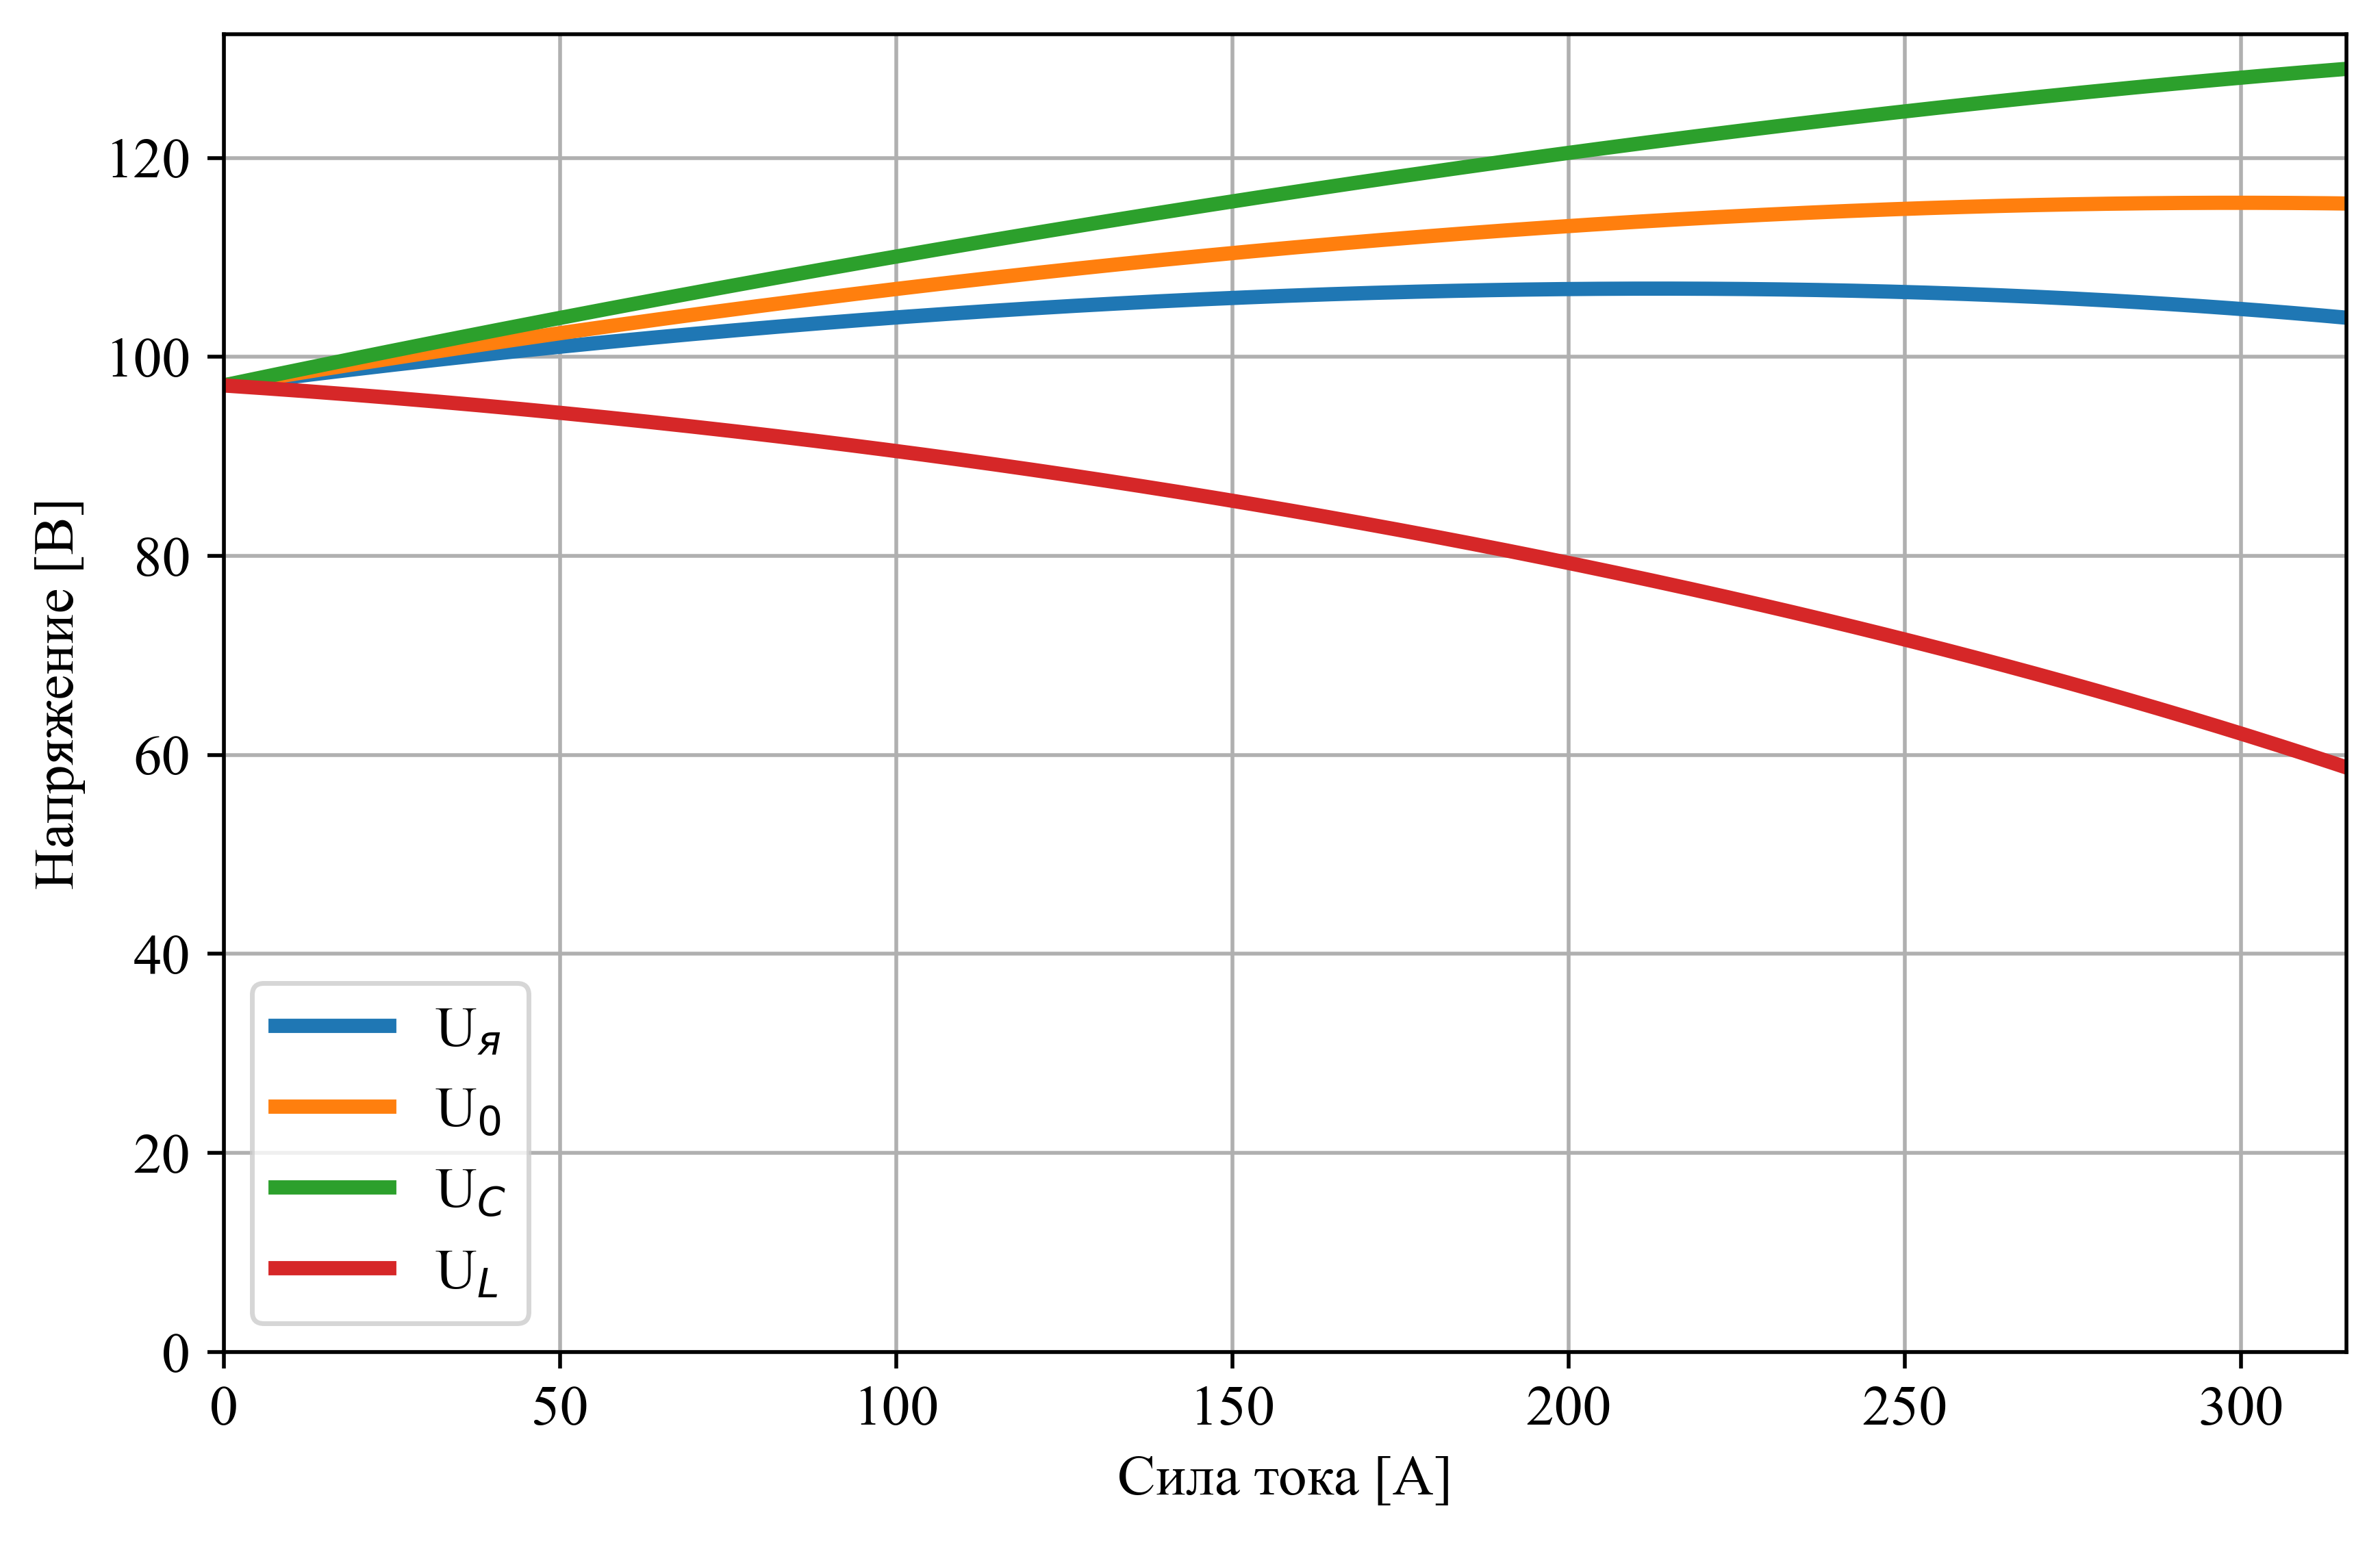

In [996]:
plt.figure(figsize=(8, 5), dpi = 500)
I = np.linspace(0, 1.5 * I_a, 350)

U_ya = np.sqrt(E_0**2 + R_a * X_c * I **2 * np.sin(2 * phi) - (X_c * I * np.cos(phi))**2 - (R_a * I * np.sin(phi))**2) - X_c * I * np.sin(phi) - R_a * I * np.cos(phi)
U_N = np.sqrt(E_0**2 + R_a * X_c * I **2 * np.sin(2 * phiN) - (X_c * I * np.cos(phiN))**2 - (R_a * I * np.sin(phiN))**2) - X_c * I * np.sin(phiN) - R_a * I * np.cos(phiN)
U_C = np.sqrt(E_0**2 + R_a * X_c * I **2 * np.sin(2 * phiC) - (X_c * I * np.cos(phiC))**2 - (R_a * I * np.sin(phiC))**2) - X_c * I * np.sin(phiC) - R_a * I * np.cos(phiC)
U_L = np.sqrt(E_0**2 + R_a * X_c * I **2 * np.sin(2 * phiL) - (X_c * I * np.cos(phiL))**2 - (R_a * I * np.sin(phiL))**2) - X_c * I * np.sin(phiL) - R_a * I * np.cos(phiL)

plt.plot(I , U_ya, linewidth = 3)
plt.plot(I ,U_N, linewidth = 3)
plt.plot(I, U_C, linewidth = 3)
plt.plot(I, U_L, linewidth = 3)

plt.legend ((f"U$_я$",\
             r"U$_{0}$",\
             r"U$_{C}$",\
             r"U$_{L}$"))

plt.ylabel(r"Напряжение [В]")
plt.xlabel(r"Сила тока [А]")


plt.grid()
plt.xlim(0, 1.5 * (I_a.to('A')).magnitude)
plt.ylim(0)
plt.show()

In [997]:
print(E_r)

-23.759999999999994 volt


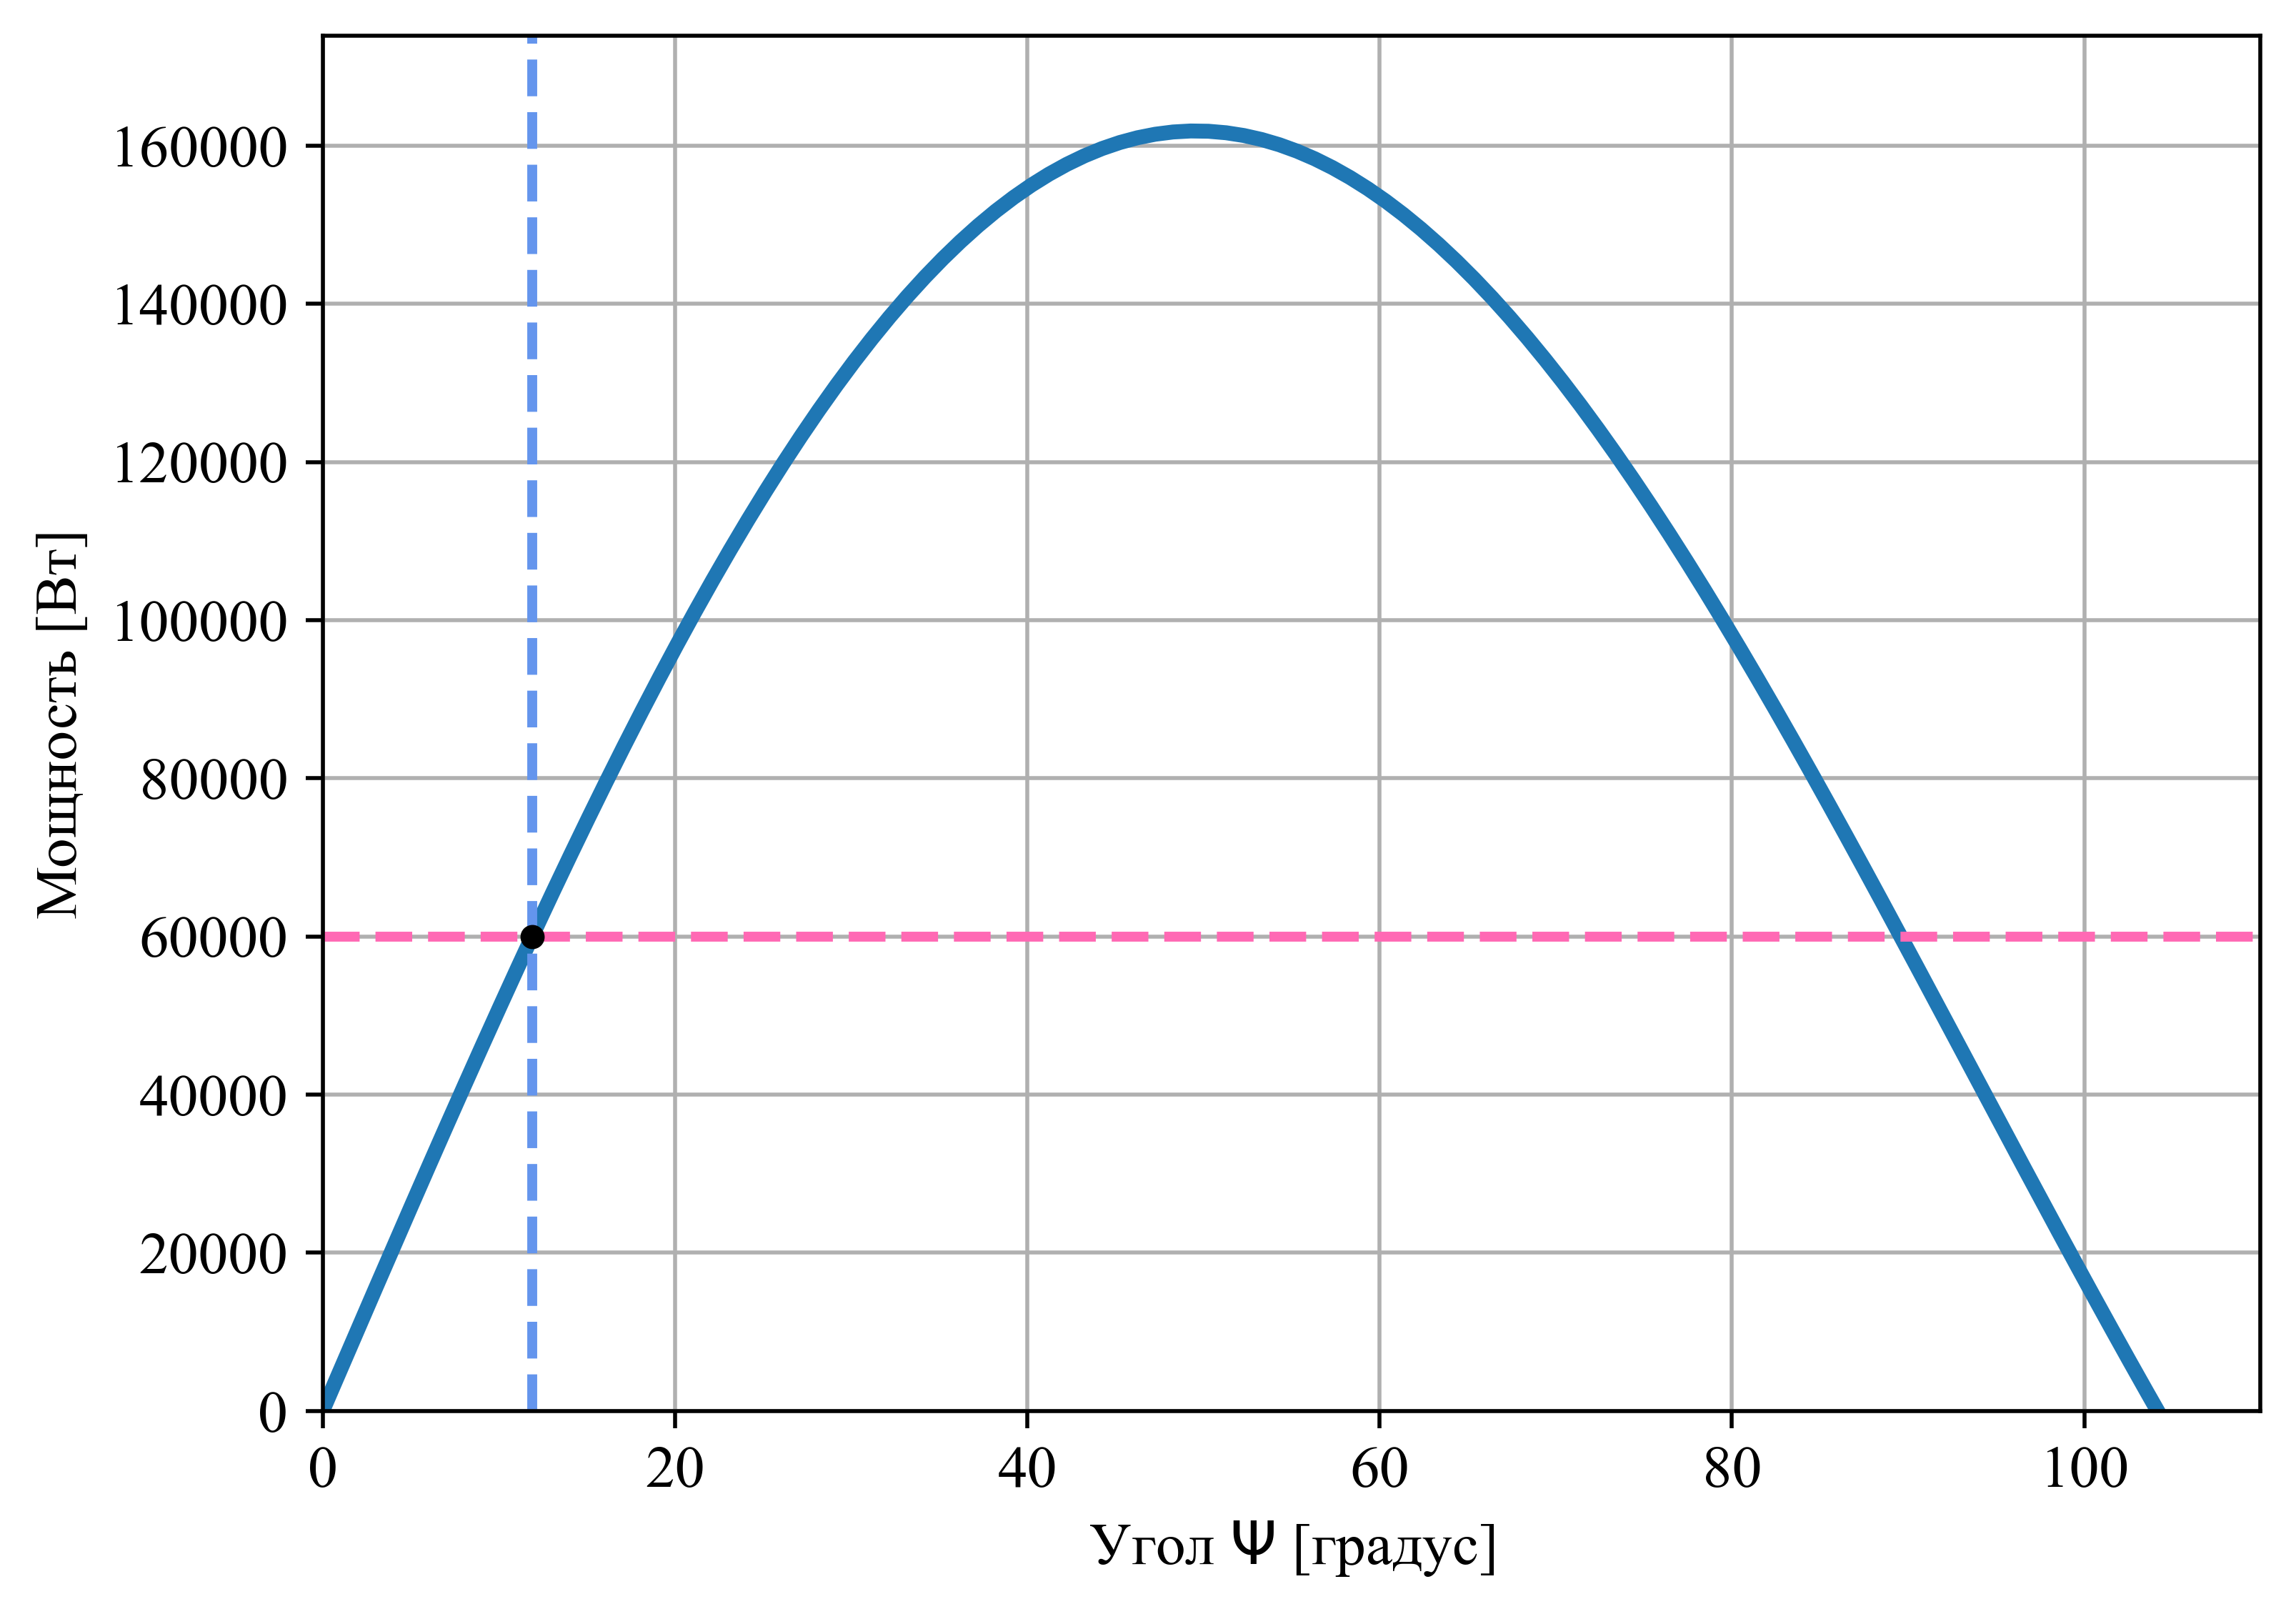

In [998]:
Psi_var = np.linspace(0, 180 * u.deg, 180)

P_2psi = m_f * E_0 * np.sin(Psi_var) / (X_c - X_L) * (E_0 * np.cos(Psi_var) - E_r) * eta
plt.figure(figsize=(7, 5), dpi = 500)
plt.plot(Psi_var ,P_2psi, linewidth = 3)

plt.axhline(round(P_2.to('W').m),color = "hotpink", linestyle = "--", linewidth = 2)
plt.axvline(-psi.to('deg').m, color = "cornflowerblue", linestyle = "--", linewidth = 2)

plt.scatter(-psi.to('deg').m, round(P_2.to('W').m), color="black",  s=15, zorder=10)


plt.ylabel(r"Мощность [Вт]")
plt.xlabel(r"Угол ${\Psi}$ [градус]")

plt.grid()
plt.xlim(0, 110)
plt.ylim(0)
plt.show()

In [999]:
print(tetta)

-20 degree


токовая угловая

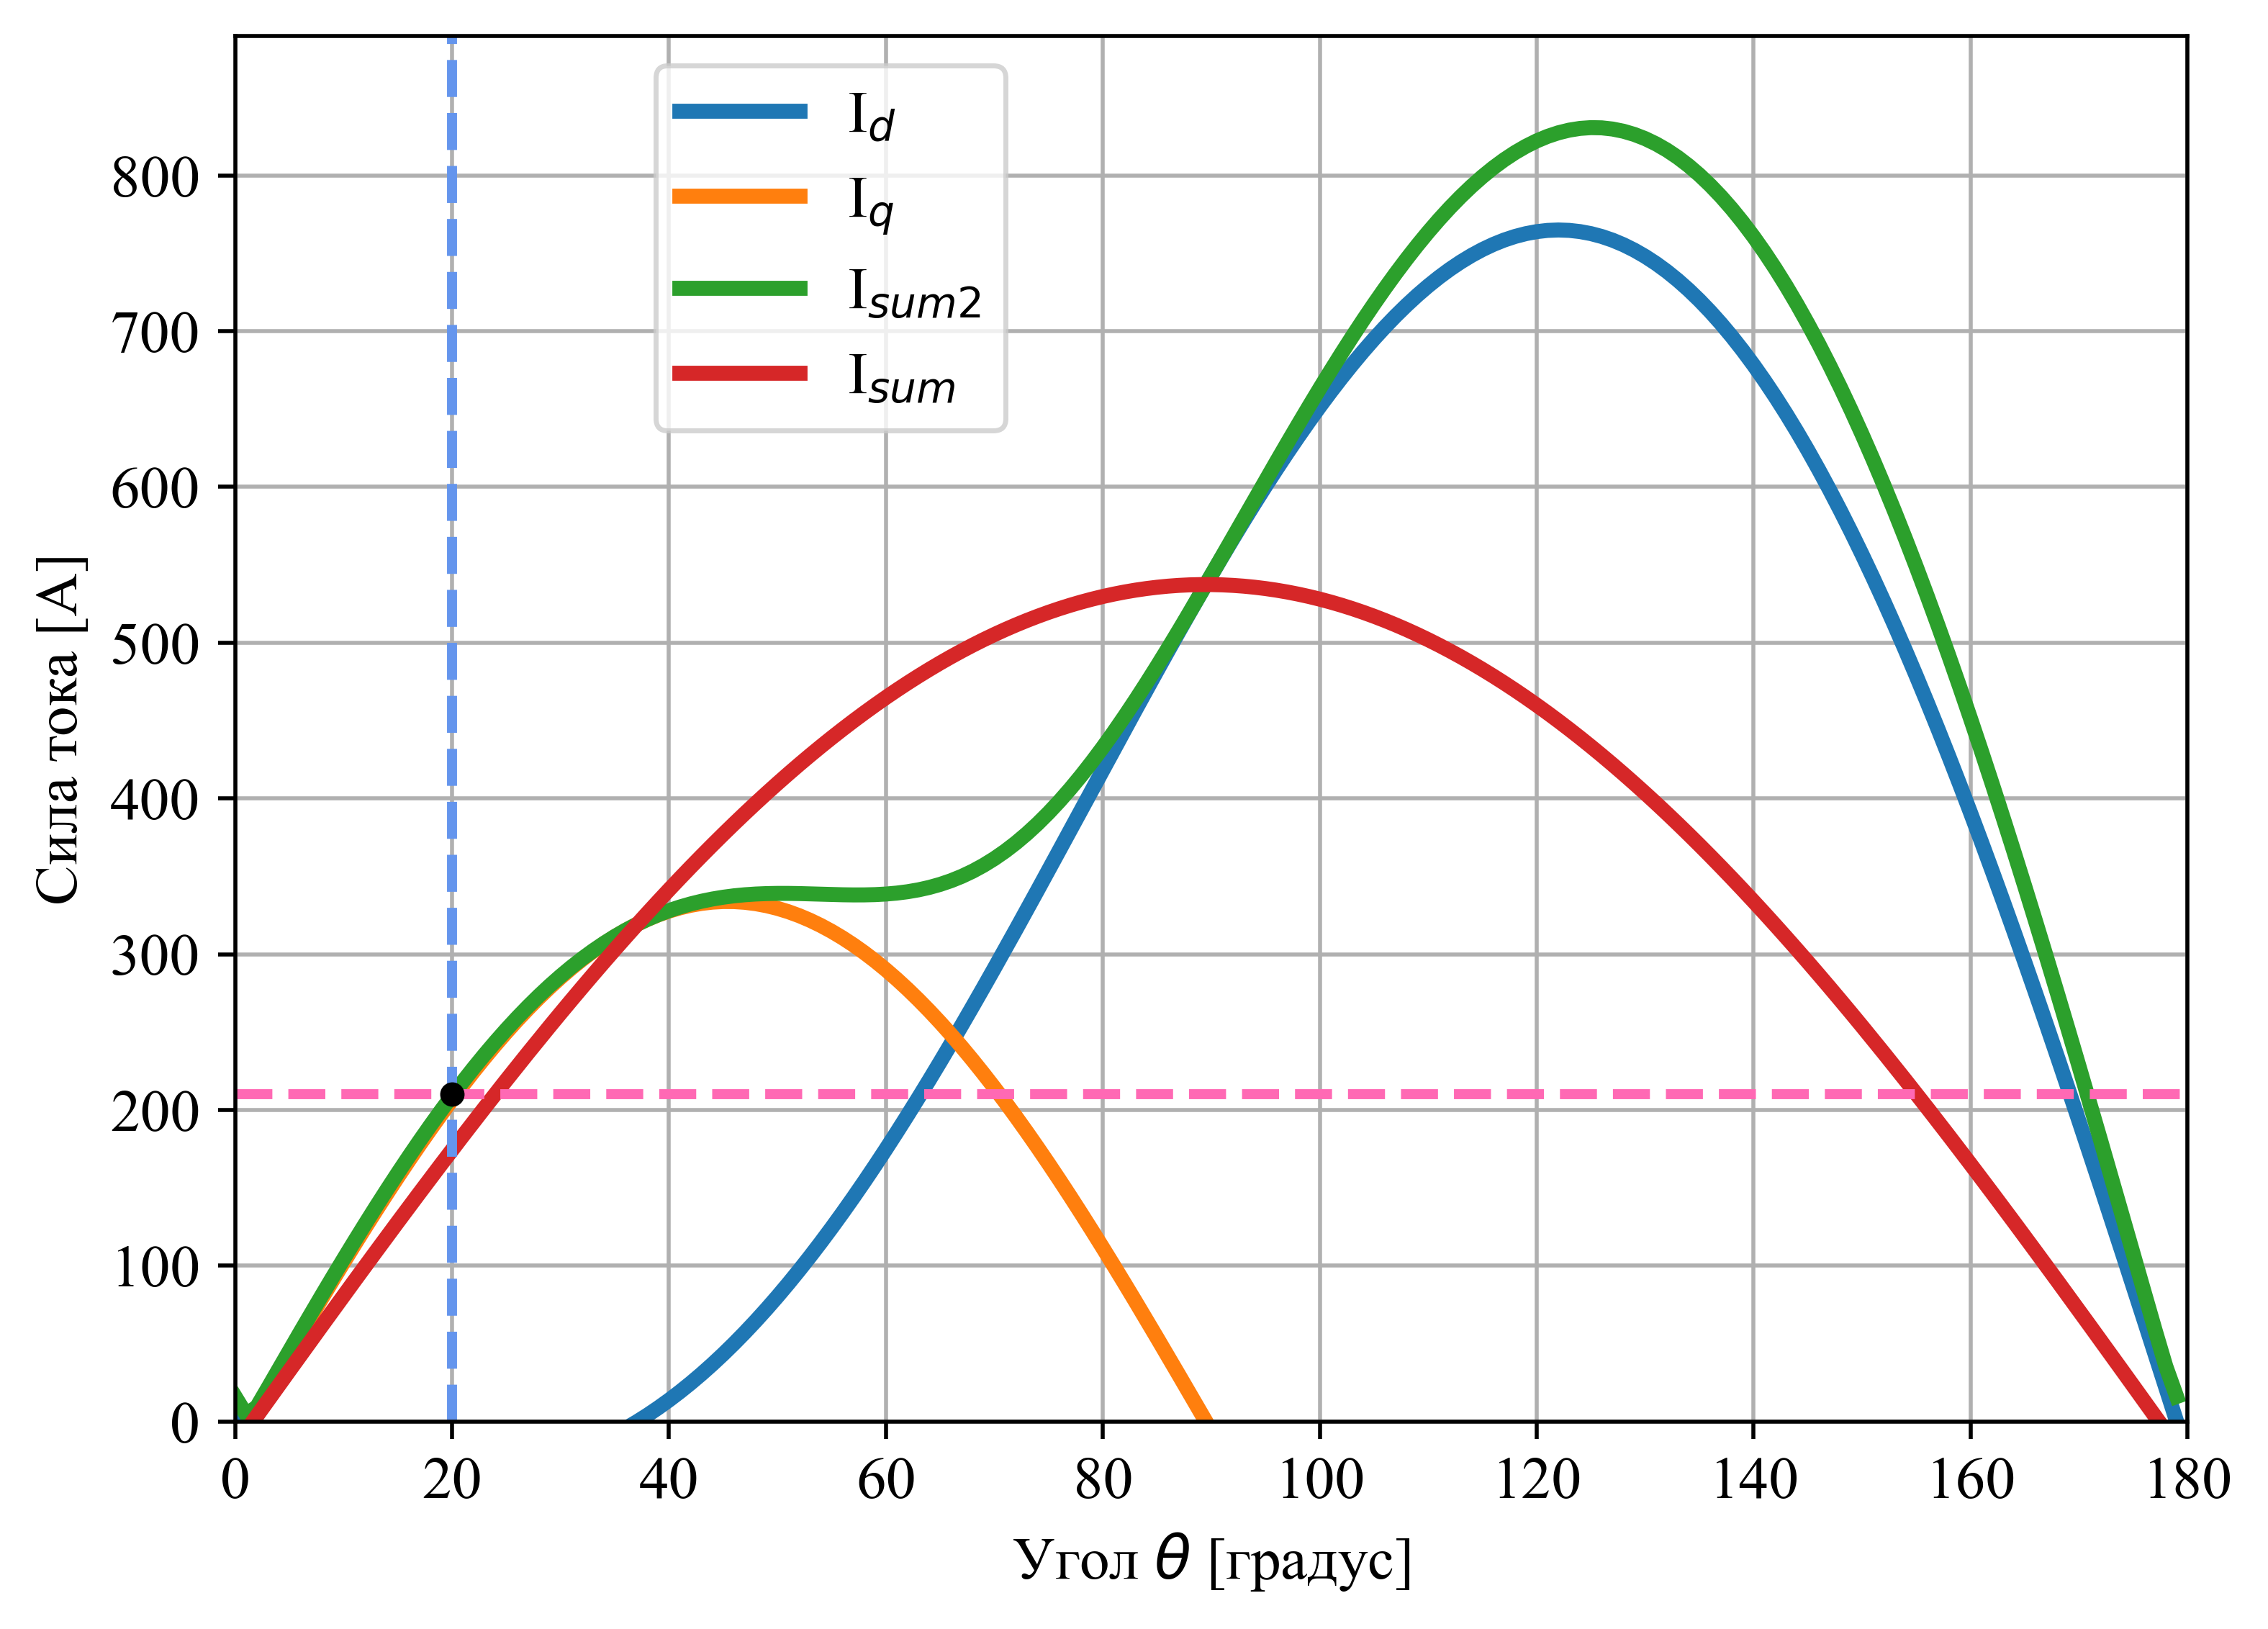

In [1000]:
theta = np.linspace( 0, np.pi, 180)

Id_angle = (E_0 - U_etta * np.cos(theta + delta_fi_R)) * np.sin(theta) / (X_d)
Iq_angle = U_etta * np.sin(theta + delta_fi_R) * np.cos(theta)/ (X_q)
I_sum2 = np.sqrt(Id_angle**2 + Iq_angle**2)
I_sum = Id_angle + Iq_angle

plt.figure(figsize=(7, 5), dpi = 500)
plt.plot(Id_angle, linewidth = 3)
plt.plot(Iq_angle, linewidth = 3)
plt.plot(I_sum2, linewidth = 3)
plt.plot(I_sum, linewidth = 3)

plt.axhline(round(I_a.to('A').m),color = "hotpink", linestyle = "--", linewidth = 2)
plt.axvline(-tetta.to('deg').m, color = "cornflowerblue", linestyle = "--", linewidth = 2)

plt.scatter(-tetta.to('deg').m, round(I_a.to('A').m), color="black",  s=15, zorder=10)

plt.legend ((f"I$_d$",\
             r"I$_{q}$",\
             r"I$_{sum2}$",\
             r"I$_{sum}$"),\
                bbox_to_anchor=(0.2, 1))

plt.ylabel(r"Сила тока [А]")
plt.xlabel(r"Угол ${\theta}$ [градус]")

plt.grid()
plt.xlim(0, 180)
plt.ylim(0)
plt.show()


MOMEHT

In [1001]:
print(n_speed)
n_speed = n_speed.to_base_units()

M_nom = P_1 / (2 * np.pi * n_speed)
print(M_nom.to_base_units())

6000 / minute
119.3662073189215 kilogram * meter ** 2 / second ** 2


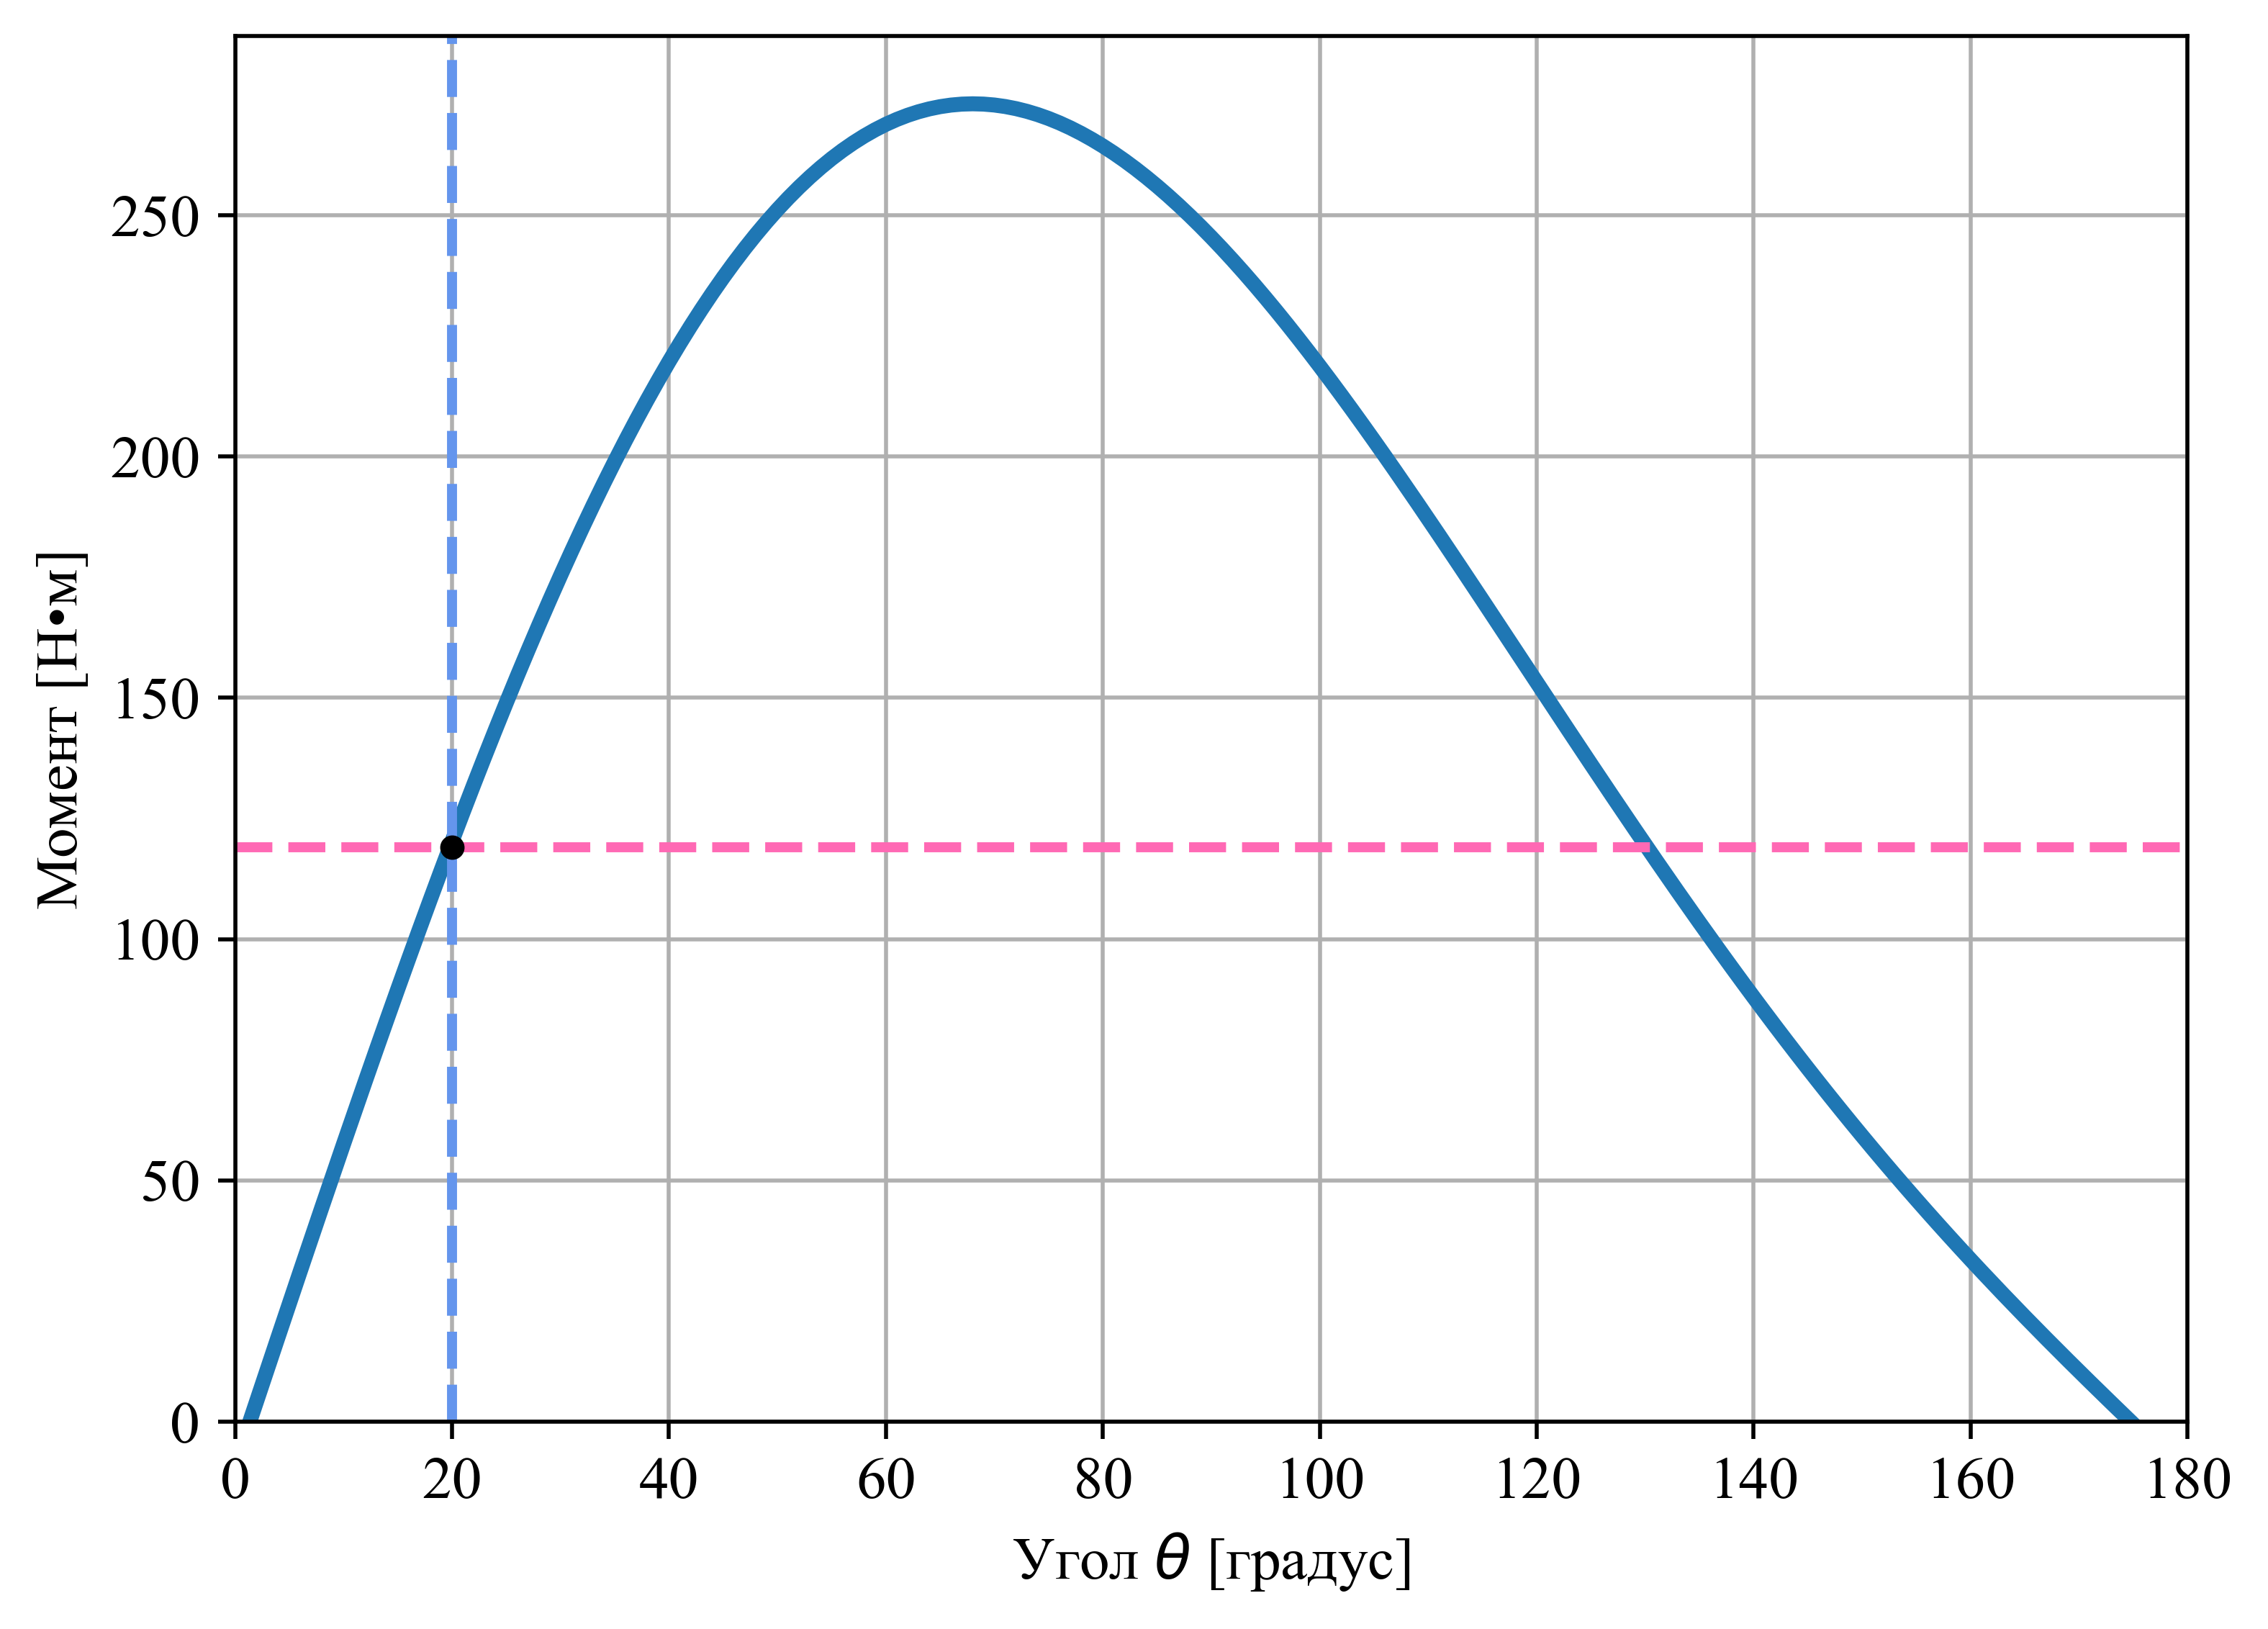

In [1002]:
plt.figure(figsize=(7, 5), dpi = 500)
theta = np.linspace( 0, np.pi, 180)
P_2_around_Ueta = m_f * U_f * eta *((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta)+ \
        ((E_0yap / X_dyap) + U_etta * np.sin(theta)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))
Moment = P_2_around_Ueta / (2 * np.pi * n_speed * eta)
Moment = Moment.to('N*m')
plt.plot(Moment, linewidth = 3)

plt.axhline(round((P_2/ (2 * np.pi * n_speed * eta)).to('N*m').m),color = "hotpink", linestyle = "--", linewidth = 2)
plt.axvline(-tetta.to('deg').m, color = "cornflowerblue", linestyle = "--", linewidth = 2)

plt.scatter(-tetta.to('deg').m, round((P_2/ (2 * np.pi * n_speed * eta)).to('N*m').m), color="black",  s=15, zorder=10)


plt.ylabel(r"Момент [Н•м]")
plt.xlabel(r"Угол ${\theta}$ [градус]")

plt.grid()
plt.xlim(0, 180)
plt.ylim(0)
plt.show()

Характеристика ХХ и регулировачная харектристика

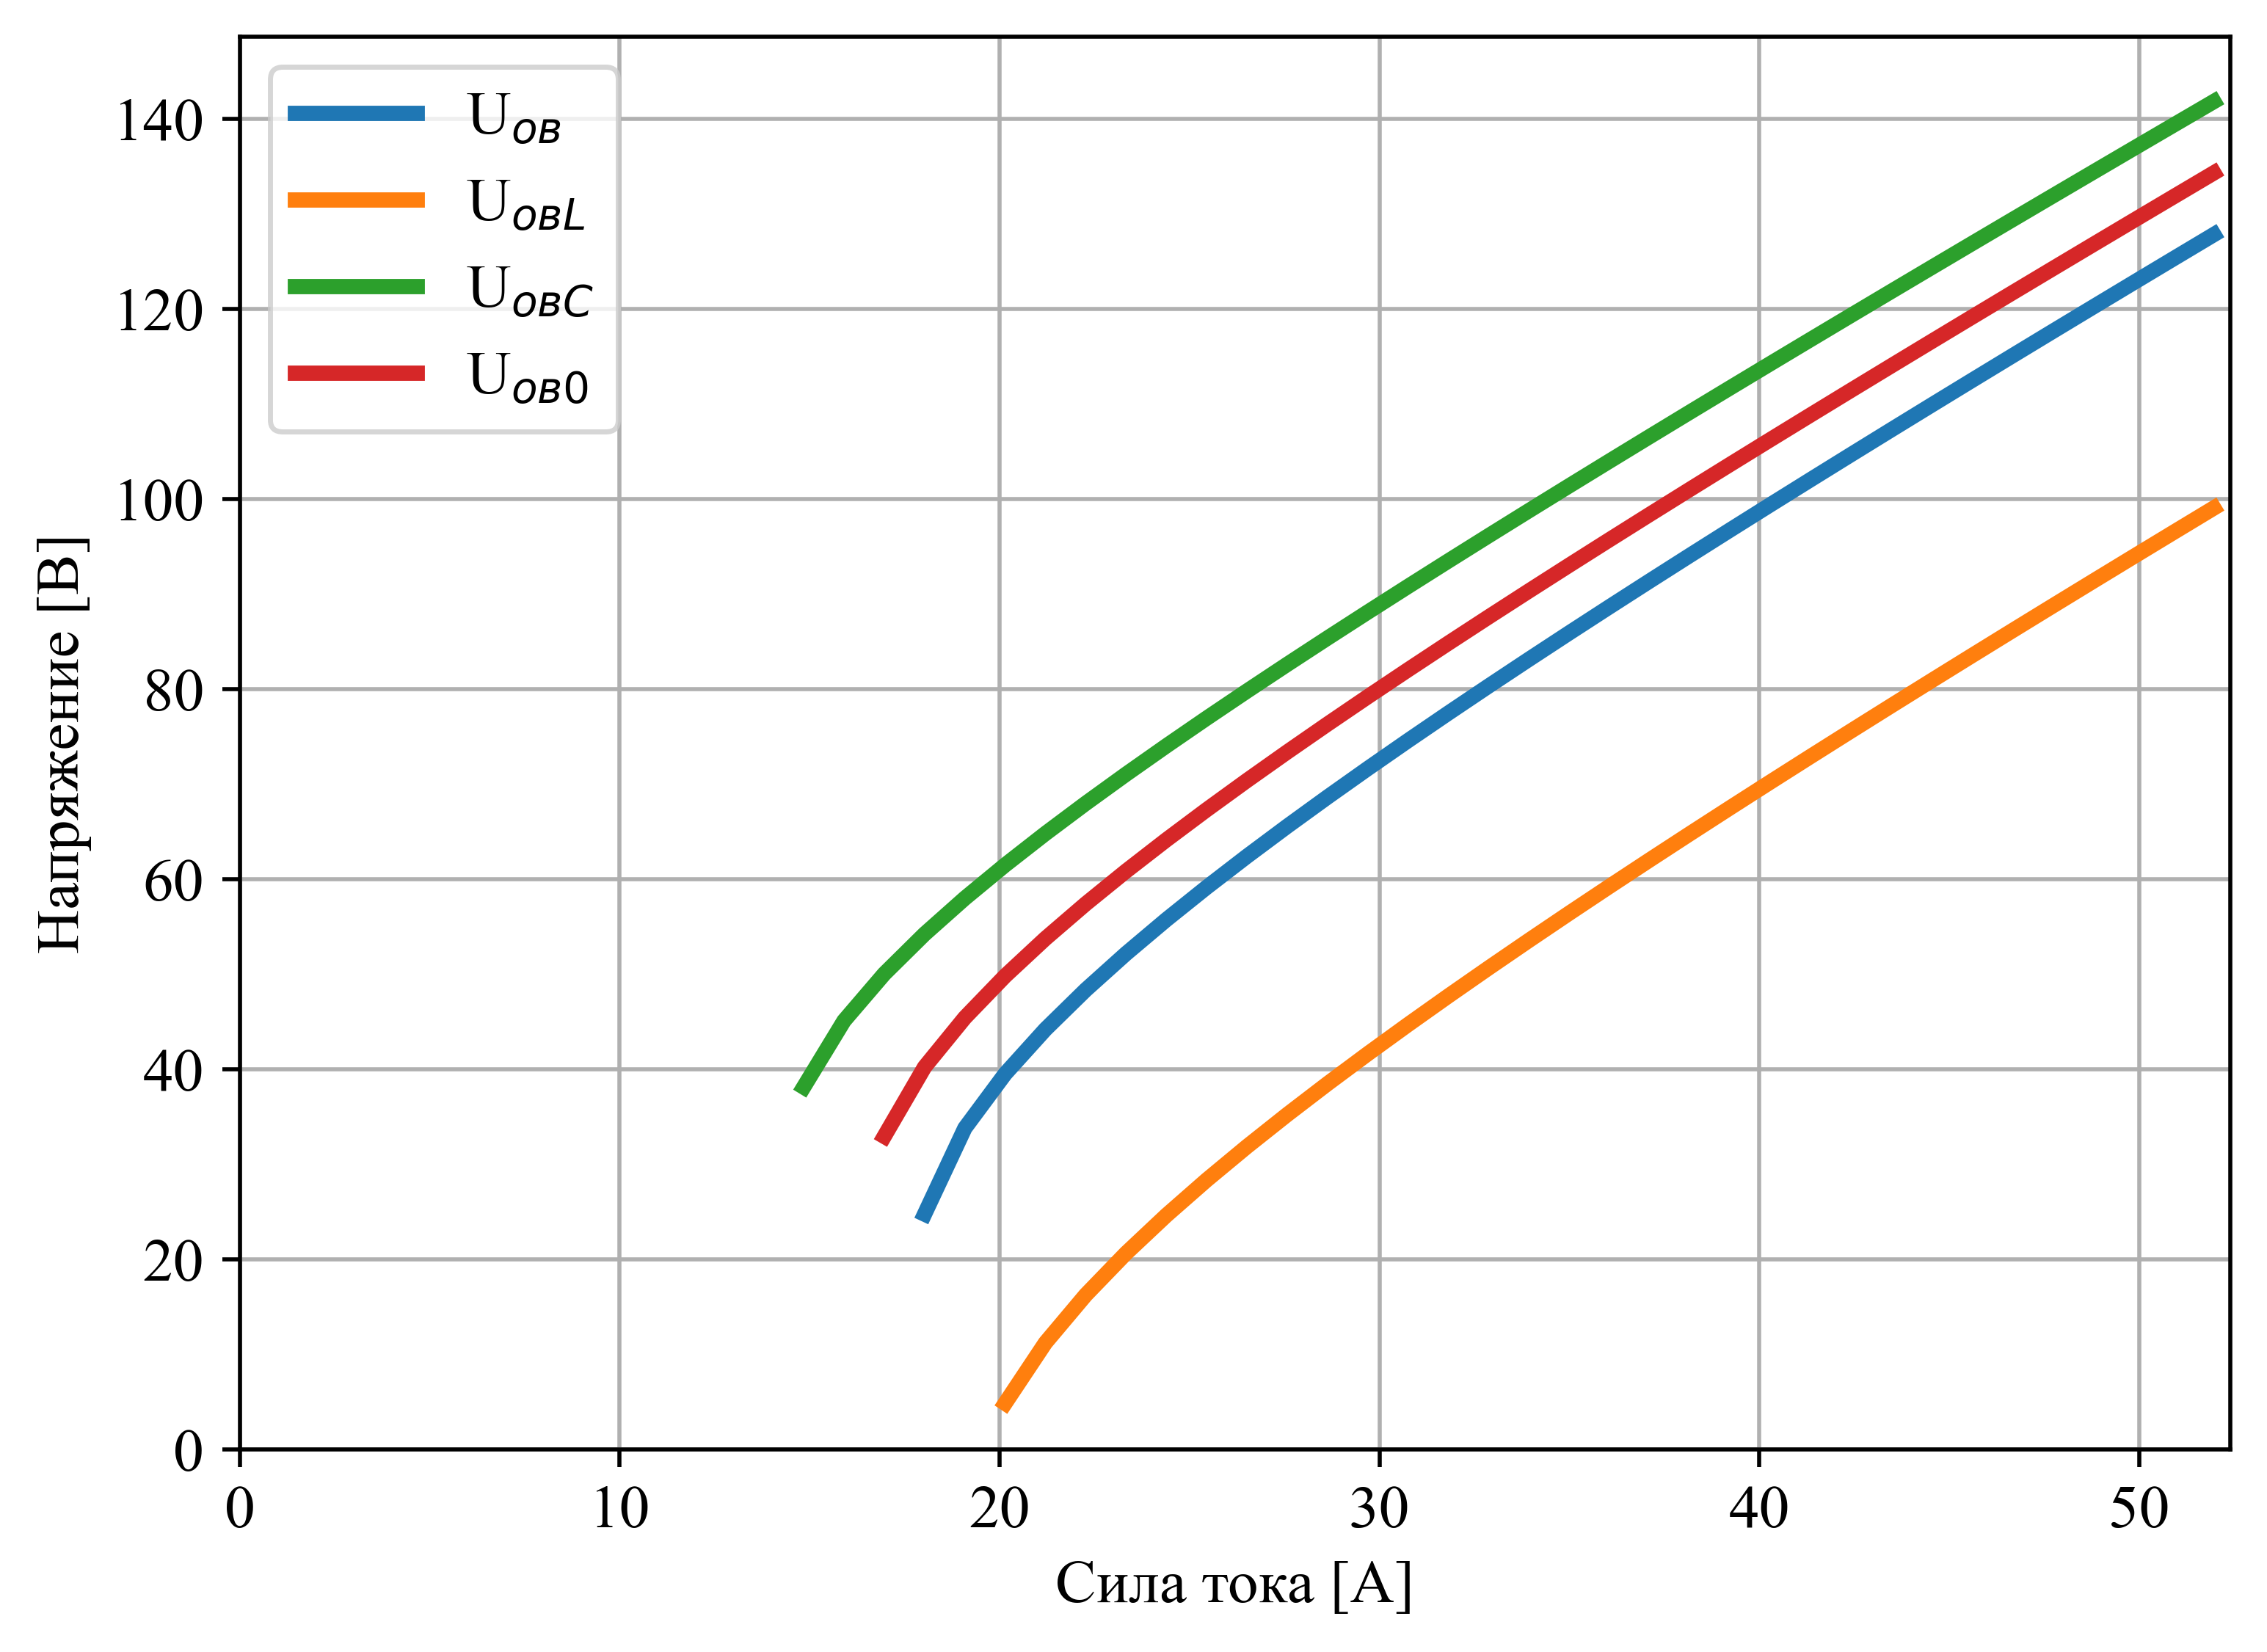

In [1003]:
plt.figure(figsize=(7, 5), dpi = 500)
I_ov_var = np.linspace(0, 1.2 * I_v)

E_0xx = E_0 * (I_ov_var * w_ov)/ F_0

U_ov = np.sqrt(E_0xx**2 +R_a * X_c * I_a**2 * np.sin(2 * phi) - (X_c * I_a * np.cos(phi))**2 - (R_a * I_a * np.sin(phi))**2) - X_c * I_a * np.sin(phi) - R_a * I_a * np.cos(phi)
U_ovL = np.sqrt(E_0xx**2 +R_a * X_c * I_a**2 * np.sin(2 * phiL) - (X_c * I_a * np.cos(phiL))**2 - (R_a * I_a * np.sin(phiL))**2) - X_c * I_a * np.sin(phiL) - R_a * I_a * np.cos(phiL)
U_ovC = np.sqrt(E_0xx**2 +R_a * X_c * I_a**2 * np.sin(2 * phiC) - (X_c * I_a * np.cos(phiC))**2 - (R_a * I_a * np.sin(phiC))**2) - X_c * I_a * np.sin(phiC) - R_a * I_a * np.cos(phiC)
U_ovN = np.sqrt(E_0xx**2 +R_a * X_c * I_a**2 * np.sin(2 * phiN) - (X_c * I_a * np.cos(phiN))**2 - (R_a * I_a * np.sin(phiN))**2) - X_c * I_a * np.sin(phiN) - R_a * I_a * np.cos(phiN)
plt.plot(I_ov_var, U_ov, linewidth = 3)
plt.plot(I_ov_var, U_ovL, linewidth = 3)
plt.plot(I_ov_var, U_ovC, linewidth = 3)
plt.plot(I_ov_var, U_ovN, linewidth = 3)


plt.ylabel(r"Напряжение [В]")
plt.xlabel(r"Сила тока [А]")

plt.legend ((r"U$_{ов}$",
             r"U$_{ов L}$",\
             r"U$_{ов C}$",\
             r"U$_{ов 0}$"))

plt.grid()
plt.xlim(0, 1.21 * (I_v.to('A')).magnitude)
plt.ylim(0)
plt.show()

Характеристика процесса ввода тока в ОВ

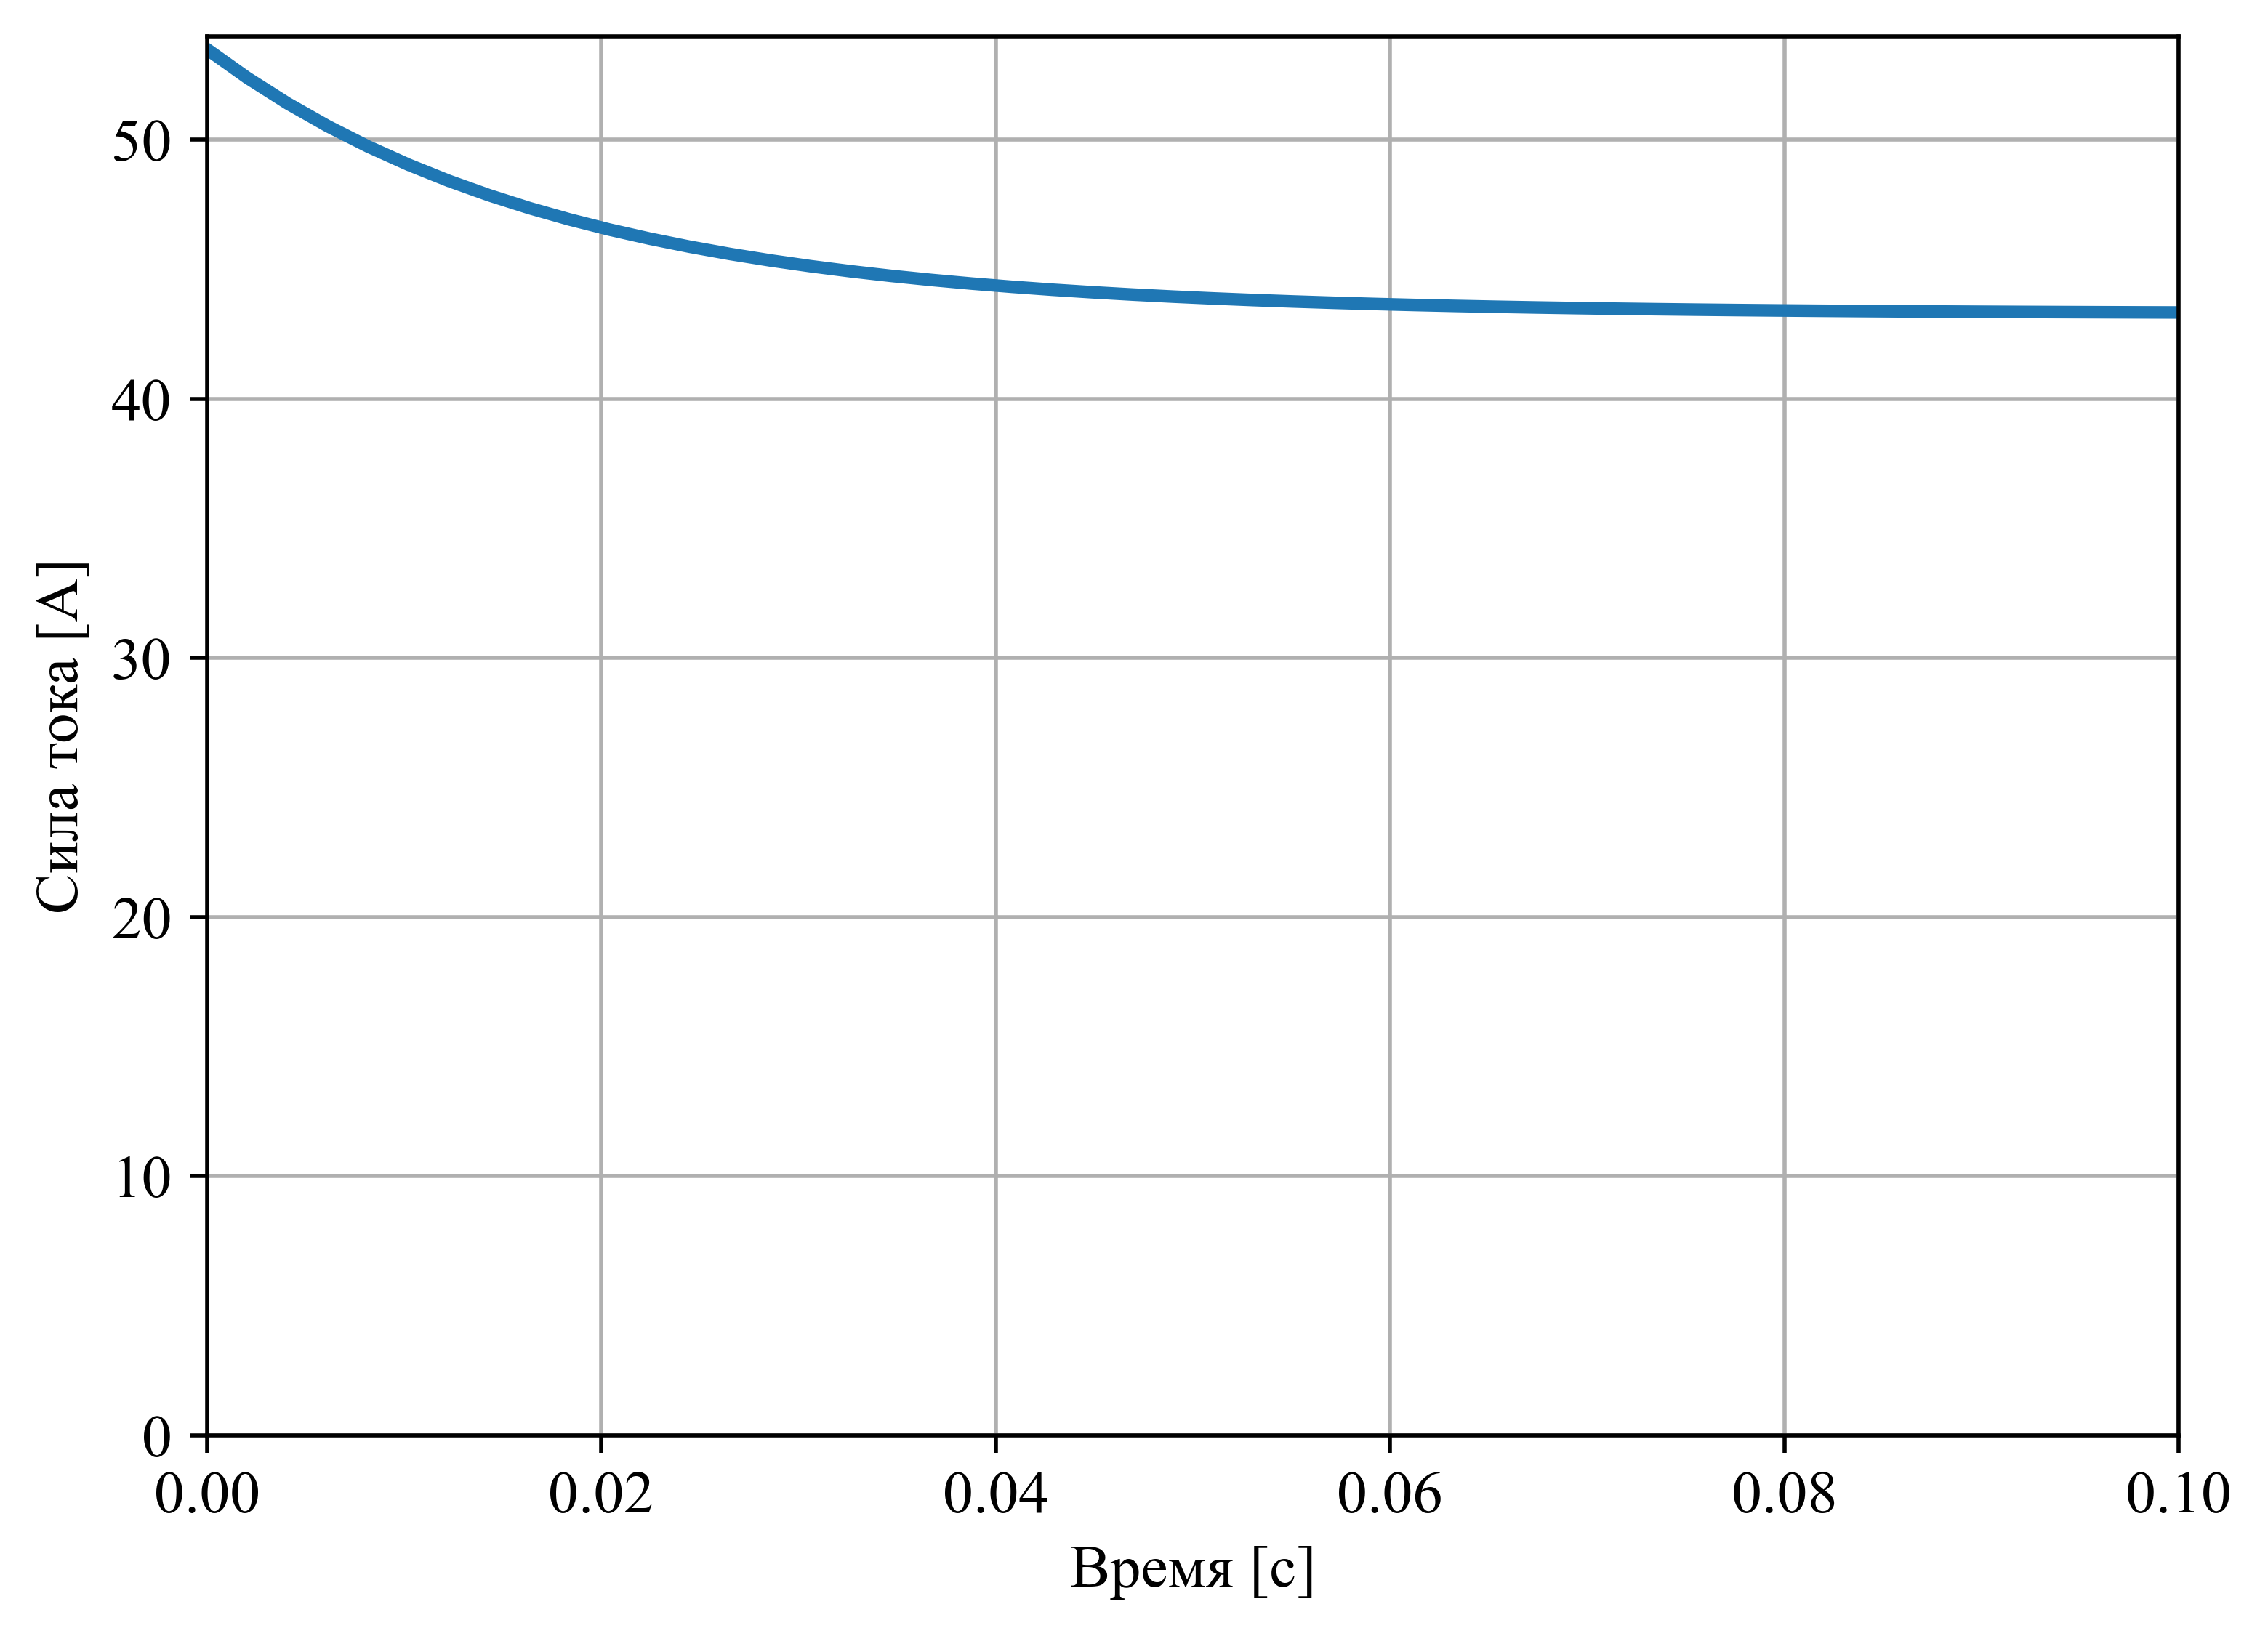

In [1004]:
plt.figure(figsize=(7, 5), dpi = 500)

t_mm = np.linspace(0 * u.sec, 0.1 * u.sec)
I_vxx1 = -(F_a * (U_f / E_a))/w_ov
I_bad = I_v - I_vxx1
Phi = B_delta * L_s * tay
L_ov = Phi * w_ov / I_v
t_pp = 0.08 * u.sec / 4.5
R_ov = L_ov / t_pp
U_v = I_v * R_ov
P_ov = I_v**2 * R_ov

I_vv = I_vxx1 + I_bad * (1 - np.exp((- R_ov * t_mm)/L_ov))
plt.plot(t_mm, I_vv, linewidth = 2.5)



plt.ylabel(r"Сила тока [А]")
plt.xlabel(r"Время [с]")

plt.grid()
plt.xlim(0, 0.1)
plt.ylim(0)
plt.show()

Мощностная характеистика

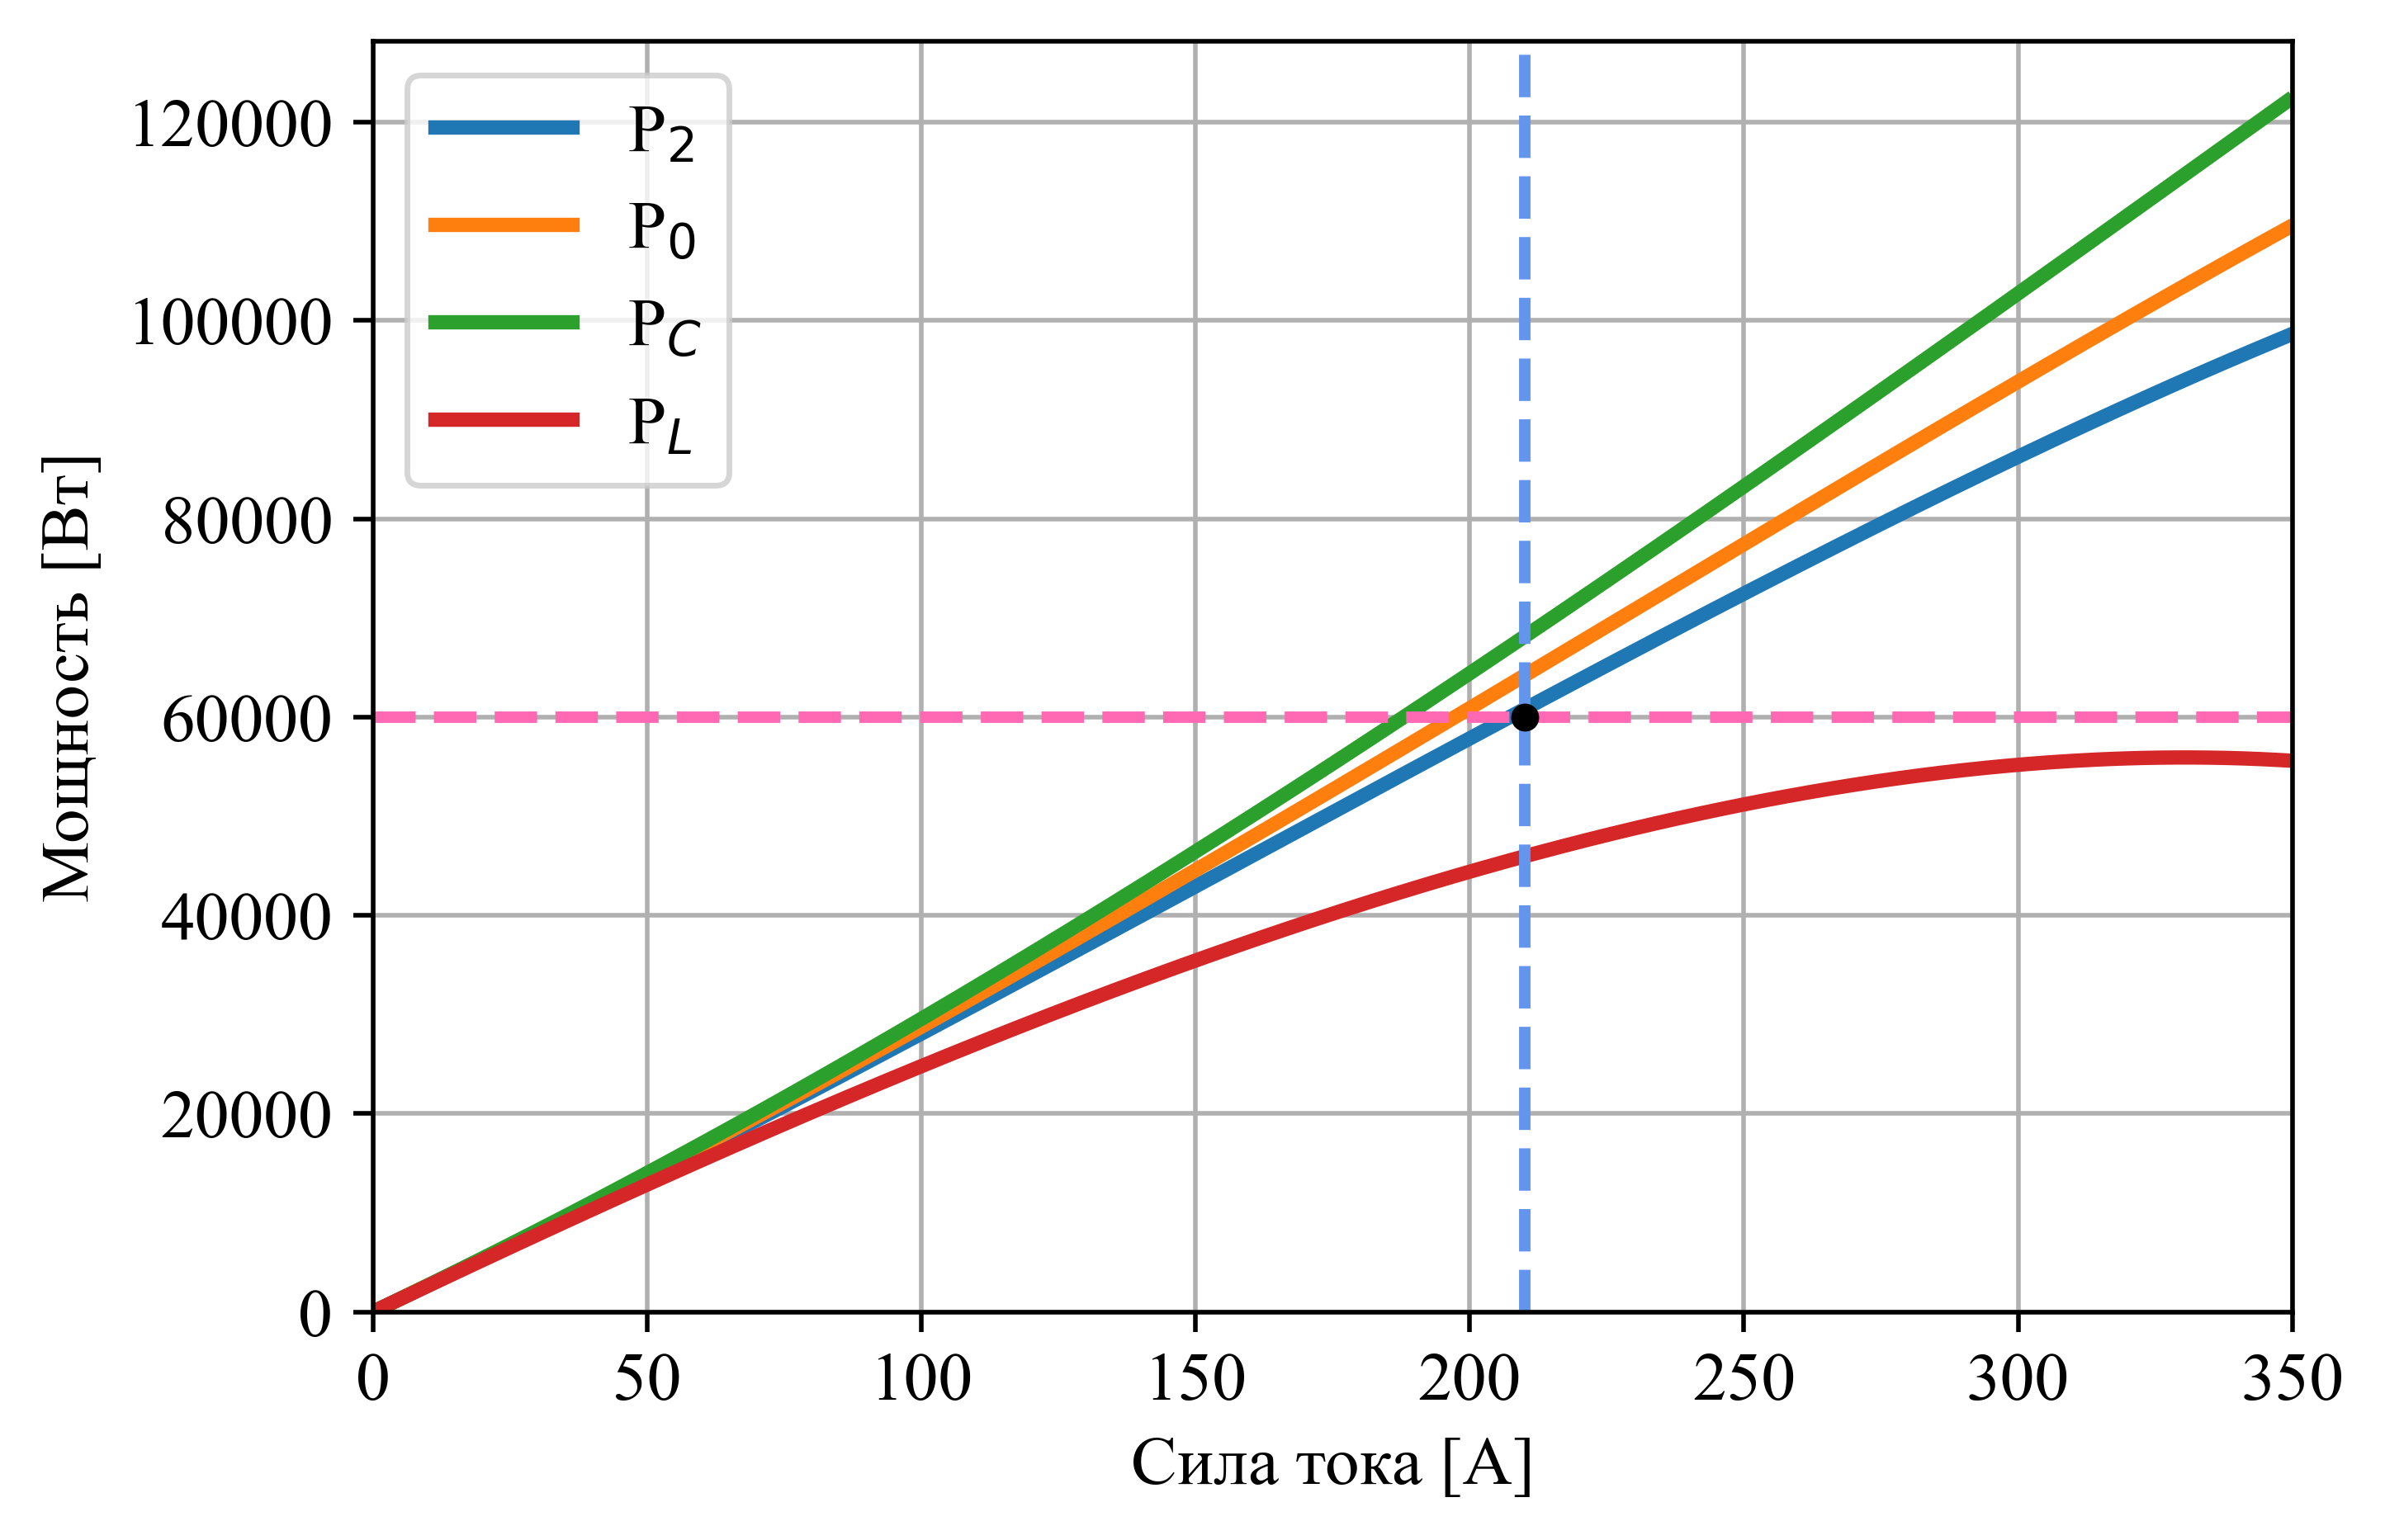

In [1005]:
plt.figure(figsize=(6, 4), dpi = 500)

P_pow_har = m_f * U_ya * I
P_N = m_f * U_N * I
P_C = m_f * U_C * I
P_L = m_f * U_L * I

plt.plot(P_pow_har, linewidth = 2.5)
plt.plot(P_N, linewidth = 2.5)
plt.plot(P_C, linewidth = 2.5)
plt.plot(P_L, linewidth = 2.5)

plt.axhline(round(P_2.to('W').m),color = "hotpink", linestyle = "--", linewidth = 2)
plt.axvline(round(I_a.to('A').m), color = "cornflowerblue", linestyle = "--", linewidth = 2)

plt.scatter(round(I_a.to('A').m), round(P_2.to('W').m), color="black",  s=15, zorder=10)


plt.ylabel(r"Мощность [Вт]")
plt.xlabel(r"Сила тока [А]")

plt.legend ((f"P$_2$",\
             r"P$_{0}$",\
             r"P$_{C}$",\
             r"P$_{L}$"))

plt.grid()
plt.xlim(0, 350)
plt.ylim(0)
plt.show()